In [1]:
# import libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

pd.set_option("display.max_rows", None, "display.max_columns", None)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA # perform PCA with n components
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# reading data set 
data = pd.read_csv('telecom_churn_data.csv')

data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [3]:
# shape of the dataset
data.shape

(99999, 226)

In [4]:
# information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


#### We have to check if the data set contains any null values. So we check the percentage of null values for each variables.

In [5]:
round(data.isnull().sum()/len(data.index)*100,2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

#### We see that there are few date variables in the given data set. These date variables are of no significance with respect to churn prediction. Hence we remove all the date variables from the data set.

Defining a list of all the date variables

In [6]:
# Date variables are stored in a column so that they can be dropped
date_vars = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8','date_of_last_rech_9', 
             'date_of_last_rech_data_6','date_of_last_rech_data_7', 'date_of_last_rech_data_8','date_of_last_rech_data_9',
             'last_date_of_month_6','last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9']

In [7]:
# Dropping the date variables from the original dataframe
data = data.drop(date_vars, axis=1)
data.shape

(99999, 214)

#### Date variables are now dropped

#### There can be meaningful missing values in many of these columns that contain nulls. Before imputing any of the meaningful null values, we need to understand if a variable is categorical or continuous.

We can see from the above data and from the data description that there are some categorical variables. Hence, we need to deifferentiate the categorical variables from the continuous variables.

#### Also, from the data description, it is very evident that variables containing 'mou', 'arpu', 'amt', 'num' are continuous variables since 'mou' means 'minutes of usage', 'arpu' and 'amt' indicates an amount and 'num' indicates a number.

#### So, we have to check the data for each type of the remaining variables. 

In [8]:
data.total_rech_data_6.value_counts()

1.0     13309
2.0      5186
3.0      2065
4.0      1335
5.0       808
6.0       588
7.0       428
8.0       341
9.0       261
10.0      219
11.0      161
12.0      136
14.0       63
13.0       59
15.0       32
17.0       30
16.0       28
18.0       20
19.0       15
20.0       14
22.0       13
21.0        6
24.0        6
25.0        4
23.0        4
32.0        3
40.0        3
26.0        3
28.0        3
29.0        2
35.0        2
34.0        1
33.0        1
27.0        1
61.0        1
55.0        1
46.0        1
Name: total_rech_data_6, dtype: int64

In [9]:
data.max_rech_data_6.value_counts()

154.0     4900
25.0      4402
252.0     3144
98.0      1441
198.0     1380
17.0      1274
23.0      1098
145.0     1062
152.0      908
14.0       669
41.0       530
179.0      517
91.0       512
46.0       418
149.0      328
177.0      315
274.0      301
56.0       301
49.0       280
455.0      197
33.0       176
125.0      170
8.0        163
202.0      145
655.0       96
505.0       74
449.0       61
1.0         45
29.0        39
101.0       31
755.0       30
951.0       27
5.0         21
22.0        18
52.0        15
13.0        14
855.0       12
1555.0       9
48.0         6
15.0         5
9.0          5
61.0         4
1255.0       3
295.0        3
148.0        1
995.0        1
495.0        1
1505.0       1
Name: max_rech_data_6, dtype: int64

In [10]:
data.count_rech_2g_6.value_counts()

1.0     10902
0.0      5920
2.0      3240
3.0      1461
4.0       984
5.0       635
6.0       477
7.0       361
8.0       287
9.0       238
10.0      196
11.0      125
12.0      111
13.0       51
14.0       46
15.0       27
17.0       19
16.0       16
18.0       13
19.0       12
20.0        7
22.0        7
21.0        5
24.0        3
25.0        3
28.0        2
34.0        1
30.0        1
32.0        1
39.0        1
42.0        1
Name: count_rech_2g_6, dtype: int64

In [11]:
data.vol_2g_mb_6.value_counts()

0.00        77731
0.01          103
0.02           70
0.03           53
0.07           42
0.04           41
0.11           37
0.05           36
0.06           31
0.14           29
0.09           29
0.13           22
0.22           22
0.08           22
0.17           21
0.19           21
0.15           21
0.12           20
0.20           18
0.36           18
4.95           17
0.10           17
0.16           17
0.24           17
0.21           17
0.18           16
0.45           15
0.95           15
0.35           15
0.49           14
0.56           14
0.54           13
0.50           13
0.46           13
0.83           13
0.44           13
1.10           12
0.31           12
0.29           12
0.28           12
0.64           12
0.41           12
0.38           12
0.33           12
0.92           12
1.19           12
0.27           12
0.34           11
0.70           11
1.31           11
0.60           11
1.15           11
0.59           11
2.15           11
1.50           11
3.77      

In [12]:
data.vol_3g_mb_6.value_counts()

0.00        85417
0.01           20
0.03           13
0.02           11
0.06            8
0.09            7
0.08            6
0.07            5
0.21            5
0.19            5
0.34            5
0.29            5
0.26            4
0.12            4
0.23            4
0.05            4
0.86            4
976.14          4
0.13            4
0.78            4
277.26          3
604.86          3
1.67            3
0.30            3
481.82          3
65.16           3
766.95          3
0.40            3
0.97            3
0.32            3
4.25            3
532.50          3
360.56          3
533.29          3
0.24            3
0.35            3
444.20          3
0.83            3
9.13            3
0.10            3
72.90           3
262.51          3
5.56            3
1.42            3
0.15            3
298.77          3
126.34          3
37.27           3
0.66            3
78.92           3
1.34            3
0.53            3
12.65           3
0.99            3
0.20            3
1486.18   

In [13]:
data.night_pck_user_6.value_counts()

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64

In [14]:
data.monthly_2g_6.value_counts()

0    92674
1     6728
2      562
3       28
4        7
Name: monthly_2g_6, dtype: int64

In [15]:
data.sachet_2g_6.value_counts()

0     87096
1      5607
2      2461
3      1333
4       950
5       584
6       464
7       343
8       291
9       230
10      194
11      119
12      111
13       53
14       44
15       28
17       18
16       16
18       13
19       13
22        7
20        6
21        5
24        3
25        3
39        1
27        1
28        1
30        1
32        1
34        1
42        1
Name: sachet_2g_6, dtype: int64

In [16]:
data.monthly_3g_6.value_counts()

0     94290
1      4472
2       861
3       237
4        76
5        34
6        12
7         9
8         3
11        2
9         2
14        1
Name: monthly_3g_6, dtype: int64

In [17]:
data.sachet_3g_6.value_counts()

0     95818
1      2990
2       607
3       216
4       108
5        65
6        45
7        45
9        24
8        20
11       12
10       12
15        5
12        4
14        4
19        4
13        3
18        3
22        3
23        3
16        2
17        2
29        2
28        1
21        1
Name: sachet_3g_6, dtype: int64

In [18]:
data.fb_user_6.value_counts()

1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64

In [19]:
data.aon.value_counts()

3651    1309
2372     652
495      319
494      299
492      296
3107     228
493      215
489      214
485      207
487      203
486      201
491      197
488      194
480      194
481      190
496      187
479      178
194      166
181      164
2600     160
482      156
342      148
235      144
478      139
202      137
473      136
228      135
306      134
277      132
195      132
234      131
475      129
185      129
474      128
186      127
326      127
484      126
356      126
188      126
468      125
208      123
321      122
223      122
216      122
222      122
314      121
370      121
187      121
334      121
349      120
230      120
200      119
464      118
214      118
439      118
303      118
251      117
264      117
443      117
327      116
201      115
476      115
490      115
209      115
207      115
213      115
341      114
328      114
466      114
607      113
300      113
346      113
212      113
272      113
296      113
398      113
310      113

In [20]:
data.aug_vbc_3g.value_counts()

0.00        83313
0.17           11
0.05           10
0.07            9
0.26            9
0.66            8
0.30            8
0.03            8
0.02            8
0.09            8
0.04            8
0.18            7
0.81            7
0.33            6
0.19            6
0.49            6
0.36            6
0.11            6
0.12            6
1.17            5
9.48            5
2.57            5
0.16            5
0.59            5
0.23            5
1.43            5
0.70            5
0.25            5
1.19            5
0.45            5
115.17          5
0.27            5
0.83            5
0.57            5
1.16            5
12.06           4
1.12            4
0.78            4
14.22           4
32.57           4
1.60            4
4.28            4
14.32           4
30.41           4
8.56            4
0.44            4
1.70            4
18.57           4
1.52            4
0.96            4
7.30            4
0.32            4
0.82            4
12.66           4
22.84           4
0.67      

So, from the above data distribution we can easily understand that the categorical variables are:
- night_pck_user_6
- night_pck_user_7
- night_pck_user_8
- night_pck_user_9
- monthly_2g_6
- monthly_2g_7
- monthly_2g_8
- monthly_2g_9
- monthly_3g_6
- monthly_3g_7
- monthly_3g_8
- monthly_3g_9
- fb_user_6
- fb_user_7
- fb_user_8
- fb_user_9

#### We create a list for the categorical variables for ease

In [21]:
cat_vars = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_2g_9','monthly_3g_6','monthly_3g_7','monthly_3g_8','monthly_3g_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']

#### The numerical variables are rest of the variables from the dataframe

In [22]:
num_vars = data.columns.difference(cat_vars)
num_vars

Index(['aon', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_6',
       ...
       'total_rech_num_8', 'total_rech_num_9', 'vol_2g_mb_6', 'vol_2g_mb_7',
       'vol_2g_mb_8', 'vol_2g_mb_9', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'vol_3g_mb_9'],
      dtype='object', length=198)

#### Now we are good to look for the missing values in the variables. First we look for missing values in the categorical variables

In [23]:
round(data[cat_vars].isnull().sum()/len(data.index)*100,2)

night_pck_user_6    74.85
night_pck_user_7    74.43
night_pck_user_8    73.66
night_pck_user_9    74.08
monthly_2g_6         0.00
monthly_2g_7         0.00
monthly_2g_8         0.00
monthly_2g_9         0.00
monthly_3g_6         0.00
monthly_3g_7         0.00
monthly_3g_8         0.00
monthly_3g_9         0.00
fb_user_6           74.85
fb_user_7           74.43
fb_user_8           73.66
fb_user_9           74.08
dtype: float64

In [24]:
data.night_pck_user_6.value_counts()

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64

In [25]:
data.fb_user_6.value_counts()

1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64

By looking into the above two type of categorical variables and the data description, we can understand that missing values could mean the customers did not use the service. And here 0.0 means that the customer did not use it hence we can impute these variables with 0.0

#### Imputing the categorical variables with 0.0 as this seems meaningful missing value

In [26]:
cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
data[cols] = data[cols].fillna(0.0)

In [27]:
round(data[cat_vars].isnull().sum()/len(data.index)*100,2)

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
monthly_2g_6        0.0
monthly_2g_7        0.0
monthly_2g_8        0.0
monthly_2g_9        0.0
monthly_3g_6        0.0
monthly_3g_7        0.0
monthly_3g_8        0.0
monthly_3g_9        0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

#### Now, we'll look for missing values in continuous variables

In [28]:
round(data[num_vars].isnull().sum()/len(data.index)*100,2)

aon                    0.00
arpu_2g_6             74.85
arpu_2g_7             74.43
arpu_2g_8             73.66
arpu_2g_9             74.08
arpu_3g_6             74.85
arpu_3g_7             74.43
arpu_3g_8             73.66
arpu_3g_9             74.08
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
aug_vbc_3g             0.00
av_rech_amt_data_6    74.85
av_rech_amt_data_7    74.43
av_rech_amt_data_8    73.66
av_rech_amt_data_9    74.08
circle_id              0.00
count_rech_2g_6       74.85
count_rech_2g_7       74.43
count_rech_2g_8       73.66
count_rech_2g_9       74.08
count_rech_3g_6       74.85
count_rech_3g_7       74.43
count_rech_3g_8       73.66
count_rech_3g_9       74.08
ic_others_6            3.94
ic_others_7            3.86
ic_others_8            5.38
ic_others_9            7.75
isd_ic_mou_6           3.94
isd_ic_mou_7           3.86
isd_ic_mou_8           5.38
isd_ic_mou_9           7.75
isd_og_mou_6        

#### Few of the variables contain more than 60% missing values. These variables do not contribute much in the prediction. Hence, we drop all such variables that contain more than 60% missing values.

In [29]:
data = data.drop(data.loc[:,round(100*(data.isnull().sum()/len(data.index)),2)>=60],axis=1)

In [30]:
drop_cols = ['max_rech_data_8', 'total_rech_data_8', 'arpu_2g_6', 'av_rech_amt_data_9', 'max_rech_data_7', 'count_rech_3g_6', 'total_rech_data_7', 'arpu_2g_7', 'count_rech_2g_6', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_8', 'total_rech_data_9', 'av_rech_amt_data_7', 'arpu_3g_7', 'count_rech_2g_7', 'count_rech_2g_8', 'arpu_2g_8', 'max_rech_data_9', 'count_rech_2g_9', 'arpu_3g_8', 'max_rech_data_6', 'arpu_3g_9', 'arpu_3g_6', 'count_rech_3g_7', 'arpu_2g_9', 'count_rech_3g_9', 'total_rech_data_6']
num_vars = num_vars.difference(drop_cols)

In [31]:
round(data[num_vars].isnull().sum()/len(data.index)*100,2)

aon                   0.00
arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
arpu_9                0.00
aug_vbc_3g            0.00
circle_id             0.00
ic_others_6           3.94
ic_others_7           3.86
ic_others_8           5.38
ic_others_9           7.75
isd_ic_mou_6          3.94
isd_ic_mou_7          3.86
isd_ic_mou_8          5.38
isd_ic_mou_9          7.75
isd_og_mou_6          3.94
isd_og_mou_7          3.86
isd_og_mou_8          5.38
isd_og_mou_9          7.75
jul_vbc_3g            0.00
jun_vbc_3g            0.00
last_day_rch_amt_6    0.00
last_day_rch_amt_7    0.00
last_day_rch_amt_8    0.00
last_day_rch_amt_9    0.00
loc_ic_mou_6          3.94
loc_ic_mou_7          3.86
loc_ic_mou_8          5.38
loc_ic_mou_9          7.75
loc_ic_t2f_mou_6      3.94
loc_ic_t2f_mou_7      3.86
loc_ic_t2f_mou_8      5.38
loc_ic_t2f_mou_9      7.75
loc_ic_t2m_mou_6      3.94
loc_ic_t2m_mou_7      3.86
loc_ic_t2m_mou_8      5.38
loc_ic_t2m_mou_9      7.75
l

#### We check the data in the variable 'circle_id'

In [32]:
data.circle_id.value_counts()

109    99999
Name: circle_id, dtype: int64

We see that, this variable has samedata for all the records and so, we do not need this information for our analysis. Hence, we drop this variable.

In [33]:
data = data.drop('circle_id', axis=1)

In [34]:
data.shape

(99999, 185)

Again we check the missing values in the continuous variables

In [35]:
num_vars=list(num_vars)
num_vars.remove('circle_id')

In [36]:
round(data[num_vars].isnull().sum()/len(data.index)*100,2)

aon                   0.00
arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
arpu_9                0.00
aug_vbc_3g            0.00
ic_others_6           3.94
ic_others_7           3.86
ic_others_8           5.38
ic_others_9           7.75
isd_ic_mou_6          3.94
isd_ic_mou_7          3.86
isd_ic_mou_8          5.38
isd_ic_mou_9          7.75
isd_og_mou_6          3.94
isd_og_mou_7          3.86
isd_og_mou_8          5.38
isd_og_mou_9          7.75
jul_vbc_3g            0.00
jun_vbc_3g            0.00
last_day_rch_amt_6    0.00
last_day_rch_amt_7    0.00
last_day_rch_amt_8    0.00
last_day_rch_amt_9    0.00
loc_ic_mou_6          3.94
loc_ic_mou_7          3.86
loc_ic_mou_8          5.38
loc_ic_mou_9          7.75
loc_ic_t2f_mou_6      3.94
loc_ic_t2f_mou_7      3.86
loc_ic_t2f_mou_8      5.38
loc_ic_t2f_mou_9      7.75
loc_ic_t2m_mou_6      3.94
loc_ic_t2m_mou_7      3.86
loc_ic_t2m_mou_8      5.38
loc_ic_t2m_mou_9      7.75
loc_ic_t2o_mou        1.02
l

In [37]:
temp_data = data[num_vars]

In [38]:
null_cols = (temp_data.loc[:,(round(temp_data.isnull().sum()/len(temp_data.index)*100,2)>0.00)]).columns

In [39]:
null_cols

Index(['ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'isd_ic_mou_9',
       'isd_og_mou_6', 'isd_og_mou_7',
       ...
       'std_og_t2f_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2o_mou',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2t_mou_9'],
      dtype='object', length=119)

In [40]:
data[null_cols].describe()

ic_others_6   ic_others_7   ic_others_8   ic_others_9  isd_ic_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean       0.854656      1.012960      0.970800      1.017162      7.460608   
std       11.955164     12.673099     13.284348     12.381172     59.722948   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max     1362.940000   1495.940000   2327.510000   1005.230000   6789.410000   

       isd_ic_mou_7  isd_ic_mou_8  isd_ic_mou_9  isd_og_mou_6  isd_og_mou_7  \
count  96140.000000  94621.000000  92254.000000  96062.000000  96140.000000   
mean       8.334936      8.442001      8.063003      0.798277      0.776572   
std       65.219829     63.813098     63.505379     25.765248     25.603052   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max     5289.540000   4127.010000   5057.740000   5900.660000   5490.280000   

       isd_og_mou_8  isd_og_mou_9  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
count  94621.000000  92254.000000  96062.000000  96140.000000  94621.000000   
mean       0.791247      0.723892    167.491059    167.719540    167.432575   
std       25.544471     21.310751    254.124029    256.242707    250.025523   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000     30.390000     32.460000     32.740000   
50%        0.000000      0.000000     92.160000     92.550000     93.830000   
75%        0.000000      0.000000    208.075000    205.837500    207.280000   
max     5681.540000   4244.530000   7454.630000   9669.910000  10830.160000   

       loc_ic_mou_9  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  \
count  92254.000000      96062.000000      96140.000000      94621.000000   
mean     164.619293         12.084305         12.599697         11.751834   
std      249.845070         40.140895         42.977442         39.125379   
min        0.000000          0.000000          0.000000          0.000000   
25%       32.290000          0.000000          0.000000          0.000000   
50%       91.640000          0.880000          0.930000          0.930000   
75%      202.737500          8.140000          8.282500          8.110000   
max    10796.290000       1872.340000       1983.010000       2433.060000   

       loc_ic_t2f_mou_9  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  \
count      92254.000000      96062.000000      96140.000000      94621.000000   
mean          12.173105        107.475650        107.120493        108.460515   
std           43.840776        171.713903        169.423620        169.723759   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000         17.290000         18.590000         18.930000   
50%            0.960000         56.490000         57.080000         58.240000   
75%            8.140000        132.387500        130.960000        133.930000   
max         4318.280000       4693.860000       4455.830000       6274.190000   

       loc_ic_t2m_mou_9  loc_ic_t2o_mou  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  \
count      92254.000000         98981.0      96062.000000      96140.000000   
mean         106.155471             0.0         47.922365         47.990520   
std          165.492803             0.0        140.258485        145.795055   
min            0.000000             0.0          0.000000          0.000000   
25%           18.560000             0.0          2.99

It can be seen from the statistical description of these columns, median will be a good parameter to impute the missing values in these variables.

In [41]:
data[null_cols]=data[null_cols].fillna(data.mode().iloc[0])

In [42]:
round(data[num_vars].isnull().sum()/len(data.index)*100,2)

aon                   0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
aug_vbc_3g            0.0
ic_others_6           0.0
ic_others_7           0.0
ic_others_8           0.0
ic_others_9           0.0
isd_ic_mou_6          0.0
isd_ic_mou_7          0.0
isd_ic_mou_8          0.0
isd_ic_mou_9          0.0
isd_og_mou_6          0.0
isd_og_mou_7          0.0
isd_og_mou_8          0.0
isd_og_mou_9          0.0
jul_vbc_3g            0.0
jun_vbc_3g            0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
last_day_rch_amt_9    0.0
loc_ic_mou_6          0.0
loc_ic_mou_7          0.0
loc_ic_mou_8          0.0
loc_ic_mou_9          0.0
loc_ic_t2f_mou_6      0.0
loc_ic_t2f_mou_7      0.0
loc_ic_t2f_mou_8      0.0
loc_ic_t2f_mou_9      0.0
loc_ic_t2m_mou_6      0.0
loc_ic_t2m_mou_7      0.0
loc_ic_t2m_mou_8      0.0
loc_ic_t2m_mou_9      0.0
loc_ic_t2o_mou        0.0
loc_ic_t2t_mou_6      0.0
loc_ic_t2t_m

In [43]:
data.isnull().sum()/len(data.index)*100

mobile_number         0.0
loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_m

In [44]:
data.shape

(99999, 185)

# Filter High Value Customer (HVC)

### Deriving new variables:

In [45]:
data['total_rech_good_phase'] = data['total_rech_amt_6'] + data['total_rech_amt_7']

In [46]:
data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
0     7000842753             0.0             0.0             0.0  197.385   
1     7001865778             0.0             0.0             0.0   34.047   
2     7001625959             0.0             0.0             0.0  167.690   
3     7001204172             0.0             0.0             0.0  221.338   
4     7000142493             0.0             0.0             0.0  261.636   

    arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  214.816  213.803   21.100         0.00         0.00         0.00   
1  355.074  268.321   86.285        24.11        78.68         7.68   
2  189.058  210.226  290.714        11.54        55.24        37.26   
3  251.102  508.054  389.500        99.91        54.39       310.98   
4  309.876  238.174  163.426        50.31       149.44        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0         0.00          0.00          0.00          0.00          0.00   
1        18.34         15.74         99.84        304.76         53.76   
2        74.81        143.33        220.59        208.36        118.91   
3       241.71        123.31        109.01         71.68        113.54   
4        58.78         76.96         91.88        124.26         45.81   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0            0.0           0.00           0.00           0.00            0.0   
1            0.0           0.00           0.00           0.00            0.0   
2            0.0           0.00           0.00          38.49            0.0   
3            0.0          54.86          44.38           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00              0.00   
1           0.00           0.00           0.00             23.88   
2           0.00           0.00          70.94              7.19   
3          28.09          39.04           0.00             73.68   
4           0.00           0.00           0.00             50.31   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             74.56              7.68             18.34             11.51   
2             28.74             13.58             14.39             29.34   
3             34.81             10.61             15.49            107.43   
4            149.44             83.89             58.78             67.64   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0              0.00              0.00              0.00              0.00   
1             75.94            291.86             53.76              0.00   
2             16.86             38.46             28.16             24.11   
3             83.21             22.46             65.46              1.91   
4             91.88            124.26             37.89              0.00   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0              0.00              0.00              0.00               0.0   
1              0.00              0.00              0.00               0.0   
2             21.79             15.61             22.24               0.0   
3              0.65              4.91              2.06               0.0   
4              0.00              0.00              1.93               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0              0.00              0.00              0.00          0.00   
1              2.91              0.00              0.00         35.39   
2            135.54             45.76              0.48         60.66   
3              0.00              0.00              0.00        183.03   
4              0.00     

In [47]:
data['avg_rech_good_phase'] = data['total_rech_good_phase'] / 2
data.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6  \
0     7000842753             0.0             0.0             0.0  197.385   
1     7001865778             0.0             0.0             0.0   34.047   
2     7001625959             0.0             0.0             0.0  167.690   
3     7001204172             0.0             0.0             0.0  221.338   
4     7000142493             0.0             0.0             0.0  261.636   

    arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  214.816  213.803   21.100         0.00         0.00         0.00   
1  355.074  268.321   86.285        24.11        78.68         7.68   
2  189.058  210.226  290.714        11.54        55.24        37.26   
3  251.102  508.054  389.500        99.91        54.39       310.98   
4  309.876  238.174  163.426        50.31       149.44        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0         0.00          0.00          0.00          0.00          0.00   
1        18.34         15.74         99.84        304.76         53.76   
2        74.81        143.33        220.59        208.36        118.91   
3       241.71        123.31        109.01         71.68        113.54   
4        58.78         76.96         91.88        124.26         45.81   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0            0.0           0.00           0.00           0.00            0.0   
1            0.0           0.00           0.00           0.00            0.0   
2            0.0           0.00           0.00          38.49            0.0   
3            0.0          54.86          44.38           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00              0.00   
1           0.00           0.00           0.00             23.88   
2           0.00           0.00          70.94              7.19   
3          28.09          39.04           0.00             73.68   
4           0.00           0.00           0.00             50.31   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             74.56              7.68             18.34             11.51   
2             28.74             13.58             14.39             29.34   
3             34.81             10.61             15.49            107.43   
4            149.44             83.89             58.78             67.64   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0              0.00              0.00              0.00              0.00   
1             75.94            291.86             53.76              0.00   
2             16.86             38.46             28.16             24.11   
3             83.21             22.46             65.46              1.91   
4             91.88            124.26             37.89              0.00   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0              0.00              0.00              0.00               0.0   
1              0.00              0.00              0.00               0.0   
2             21.79             15.61             22.24               0.0   
3              0.65              4.91              2.06               0.0   
4              0.00              0.00              1.93               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0              0.00              0.00              0.00          0.00   
1              2.91              0.00              0.00         35.39   
2            135.54             45.76              0.48         60.66   
3              0.00              0.00              0.00        183.03   
4              0.00     

Creating a variable X which is the 70th percentile of the average recharge amount for the good phase. This will be used for filtering the high value customers.

In [48]:
X = data.avg_rech_good_phase.quantile([0.70])
X

0.7    368.5
Name: avg_rech_good_phase, dtype: float64

In [49]:
HVC = data.loc[(data['avg_rech_good_phase']>=368.5),:]
HVC.shape

(30011, 187)

Now after filtering the high value customers, we do not need the variables 'total_rech_good_phase' and 'avg_rech_good_phase' and hence, we drop these.

In [50]:
HVC = HVC.drop(['total_rech_good_phase', 'avg_rech_good_phase'], axis=1)
HVC.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
7      7000701601             0.0             0.0             0.0  1069.180   
8      7001524846             0.0             0.0             0.0   378.721   
13     7002191713             0.0             0.0             0.0   492.846   
16     7000875565             0.0             0.0             0.0   430.975   
17     7000187447             0.0             0.0             0.0   690.008   

      arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1349.850  3171.480  500.000        57.84        54.68        52.29   
8    492.223   137.362  166.787       413.69       351.03        35.08   
13   205.671   593.260  322.732       501.76       108.39       534.24   
16   299.869   187.894  206.490        50.51        74.01        70.61   
17    18.980    25.499  257.583      1185.91         9.28         7.79   

    onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
7          0.00        453.43        567.16        325.91          0.00   
8         33.46         94.66         80.63        136.48        108.71   
13       244.81        413.31        119.28        482.46        214.06   
16        31.34        296.29        229.74        162.76        224.39   
17       558.51         61.64          0.00          5.54         87.89   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
7           16.23          33.49          31.64           0.00          23.74   
8            0.00           0.00           0.00           0.00           0.00   
13          23.53         144.24          72.11         136.78           7.98   
16           0.00           2.83           0.00           0.00           0.00   
17           0.00           4.76           4.81           0.00           0.00   

    roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
7           12.59          38.06           0.00             51.39   
8            0.00           0.00           0.00            297.13   
13          35.26           1.44          12.78             49.63   
16          17.74           0.00           0.00             42.61   
17           8.46          13.34          17.98             38.99   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
7              31.38             40.28              0.00            308.63   
8             217.59             12.49             26.13             80.96   
13              6.19             36.01              6.14            151.13   
16             65.16             67.38             26.88            273.29   
17              0.00              0.00             36.41             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
7             447.38            162.28              0.00             62.13   
8              70.58             50.54             34.58              0.00   
13             47.28            294.46            108.24              4.54   
16            145.99            128.28            201.49              0.00   
17              0.00              0.00              9.38              0.00   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
7              55.14             53.23              0.00               0.0   
8               0.00              0.00              0.00               0.0   
13              0.00             23.51              5.29               0.0   
16              4.48             10.26              4.66               0.0   
17              0.00              0.00              0.00               0.0   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
7                0.0              0.00               0.0        422.16   
8                0.0              7.15               0.0        378.09   
13               0.0              0.49               0.0        205.31   
16               0.0        

# Derive Churn

In [51]:
# total usage of incoming and outgoing minutes
HVC['total_calls_mou_9'] = HVC.total_ic_mou_9 + HVC.total_og_mou_9

In [52]:
# calculate 2g and 3g data consumption
HVC['total_internet_mb_9'] =  HVC.vol_2g_mb_9 + HVC.vol_3g_mb_9

In [53]:
#churn variable creation 
# 0 - not churn, 1 - churn (customers who are not using of voice calls and internet data)
HVC['churn'] = HVC.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)
HVC.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
7      7000701601             0.0             0.0             0.0  1069.180   
8      7001524846             0.0             0.0             0.0   378.721   
13     7002191713             0.0             0.0             0.0   492.846   
16     7000875565             0.0             0.0             0.0   430.975   
17     7000187447             0.0             0.0             0.0   690.008   

      arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1349.850  3171.480  500.000        57.84        54.68        52.29   
8    492.223   137.362  166.787       413.69       351.03        35.08   
13   205.671   593.260  322.732       501.76       108.39       534.24   
16   299.869   187.894  206.490        50.51        74.01        70.61   
17    18.980    25.499  257.583      1185.91         9.28         7.79   

    onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
7          0.00        453.43        567.16        325.91          0.00   
8         33.46         94.66         80.63        136.48        108.71   
13       244.81        413.31        119.28        482.46        214.06   
16        31.34        296.29        229.74        162.76        224.39   
17       558.51         61.64          0.00          5.54         87.89   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
7           16.23          33.49          31.64           0.00          23.74   
8            0.00           0.00           0.00           0.00           0.00   
13          23.53         144.24          72.11         136.78           7.98   
16           0.00           2.83           0.00           0.00           0.00   
17           0.00           4.76           4.81           0.00           0.00   

    roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
7           12.59          38.06           0.00             51.39   
8            0.00           0.00           0.00            297.13   
13          35.26           1.44          12.78             49.63   
16          17.74           0.00           0.00             42.61   
17           8.46          13.34          17.98             38.99   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
7              31.38             40.28              0.00            308.63   
8             217.59             12.49             26.13             80.96   
13              6.19             36.01              6.14            151.13   
16             65.16             67.38             26.88            273.29   
17              0.00              0.00             36.41             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
7             447.38            162.28              0.00             62.13   
8              70.58             50.54             34.58              0.00   
13             47.28            294.46            108.24              4.54   
16            145.99            128.28            201.49              0.00   
17              0.00              0.00              9.38              0.00   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
7              55.14             53.23              0.00               0.0   
8               0.00              0.00              0.00               0.0   
13              0.00             23.51              5.29               0.0   
16              4.48             10.26              4.66               0.0   
17              0.00              0.00              0.00               0.0   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
7                0.0              0.00               0.0        422.16   
8                0.0              7.15               0.0        378.09   
13               0.0              0.49               0.0        205.31   
16               0.0        

#### Dropping all the variables for churn phase i.e. all variables having '_9' in their name

In [54]:
# dropping 9th month variables
HVC = HVC.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [55]:
print(HVC.shape)

# delete all variables pertains to 9th month
HVC = HVC.filter(regex='[^9]$', axis=1)
HVC.shape

(30011, 186)


(30011, 142)

In [56]:
HVC = HVC.drop('sep_vbc_3g', axis=1)

In [57]:
HVC.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
7      7000701601             0.0             0.0             0.0  1069.180   
8      7001524846             0.0             0.0             0.0   378.721   
13     7002191713             0.0             0.0             0.0   492.846   
16     7000875565             0.0             0.0             0.0   430.975   
17     7000187447             0.0             0.0             0.0   690.008   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
13   205.671   593.260       501.76       108.39       534.24        413.31   
16   299.869   187.894        50.51        74.01        70.61        296.29   
17    18.980    25.499      1185.91         9.28         7.79         61.64   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   
17          0.00          0.00           1146.91              0.81   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
7              12.01             49.89             31.76             49.14   
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99          

# Data Preparation

In [58]:
HVC.isnull().sum()

mobile_number         0
loc_og_t2o_mou        0
std_og_t2o_mou        0
loc_ic_t2o_mou        0
arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7      0
std_og_t2m_mou_8      0
std_og_t2f_mou_6      0
std_og_t2f_mou_7

In [59]:
cat_vars

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_2g_9',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'monthly_3g_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

As we have now dropped all the variables from churn phase, we need to remove the variable names from cat_vars and num_vars as well. Hence, doing so:

In [60]:
cat_vars.remove('night_pck_user_9')
cat_vars.remove('monthly_2g_9')
cat_vars.remove('monthly_3g_9')
cat_vars.remove('fb_user_9')
cat_vars

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

Similarly we remove all variables that end with '_9'

In [61]:
num_vars_9 = ['arpu_9','ic_others_9','isd_ic_mou_9','isd_og_mou_9','last_day_rch_amt_9','loc_ic_mou_9','loc_ic_t2f_mou_9','loc_ic_t2m_mou_9','loc_ic_t2t_mou_9','loc_og_mou_9','loc_og_t2c_mou_9','loc_og_t2f_mou_9','loc_og_t2m_mou_9','loc_og_t2t_mou_9','max_rech_amt_9','offnet_mou_9','og_others_9','onnet_mou_9','roam_ic_mou_9','roam_og_mou_9','sachet_2g_9','sachet_3g_9','spl_ic_mou_9','spl_og_mou_9','std_ic_mou_9','std_ic_t2f_mou_9','std_ic_t2m_mou_9','std_ic_t2o_mou_9','std_ic_t2t_mou_9','std_og_mou_9','std_og_t2c_mou_9','std_og_t2f_mou_9','std_og_t2m_mou_9','std_og_t2t_mou_9','total_ic_mou_9','total_og_mou_9','total_rech_amt_9','total_rech_num_9','vol_2g_mb_9','vol_3g_mb_9','sep_vbc_3g']
for i in num_vars_9:
    num_vars.remove(i)
print(len(num_vars))

128


In [62]:
# Also we drop the mobile_number variable from num_vars
num_vars.remove('mobile_number')

### Deriving new variables:

In [63]:
HVC['arpu_good_phase'] = HVC['arpu_6'] + HVC['arpu_7']
HVC['onnet_mou_good_phase'] = HVC['onnet_mou_6'] + HVC['onnet_mou_7']
HVC['offnet_mou_good_phase'] = HVC['offnet_mou_6'] + HVC['offnet_mou_7']
HVC['roam_ic_mou_good_phase'] = HVC['roam_ic_mou_6'] + HVC['roam_ic_mou_7']
HVC['roam_og_mou_good_phase'] = HVC['roam_og_mou_6'] + HVC['roam_og_mou_7']
HVC['loc_og_t2t_mou_good_phase'] = HVC['loc_og_t2t_mou_6'] + HVC['loc_og_t2t_mou_7']
HVC['loc_og_t2m_mou_good_phase'] = HVC['loc_og_t2m_mou_6'] + HVC['loc_og_t2m_mou_7']
HVC['loc_og_t2f_mou_good_phase'] = HVC['loc_og_t2f_mou_6'] + HVC['loc_og_t2f_mou_7']
HVC['loc_og_t2c_mou_good_phase'] = HVC['loc_og_t2c_mou_6'] + HVC['loc_og_t2c_mou_7']
HVC['loc_og_mou_good_phase'] = HVC['loc_og_mou_6'] + HVC['loc_og_mou_7']
HVC['std_og_t2t_mou_good_phase'] = HVC['std_og_t2t_mou_6'] + HVC['std_og_t2t_mou_7']
HVC['std_og_t2m_mou_good_phase'] = HVC['std_og_t2m_mou_6'] + HVC['std_og_t2m_mou_7']
HVC['std_og_t2f_mou_good_phase'] = HVC['std_og_t2f_mou_6'] + HVC['std_og_t2f_mou_7']
HVC['std_og_t2c_mou_good_phase'] = HVC['std_og_t2c_mou_6'] + HVC['std_og_t2c_mou_7']
HVC['std_og_mou_good_phase'] = HVC['std_og_mou_6'] + HVC['std_og_mou_7']
HVC['isd_og_mou_good_phase'] = HVC['isd_og_mou_6'] + HVC['isd_og_mou_7']
HVC['spl_og_mou_good_phase'] = HVC['spl_og_mou_6'] + HVC['spl_og_mou_7']
HVC['og_others_good_phase'] = HVC['og_others_6'] + HVC['og_others_7']
HVC['total_og_mou_good_phase'] = HVC['total_og_mou_6'] + HVC['total_og_mou_7']
HVC['loc_ic_t2t_mou_good_phase'] = HVC['loc_ic_t2t_mou_6'] + HVC['loc_ic_t2t_mou_7']
HVC['loc_ic_t2m_mou_good_phase'] = HVC['loc_ic_t2m_mou_6'] + HVC['loc_ic_t2m_mou_7']
HVC['loc_ic_t2f_mou_good_phase'] = HVC['loc_ic_t2f_mou_6'] + HVC['loc_ic_t2f_mou_7']
HVC['loc_ic_mou_good_phase'] = HVC['loc_ic_mou_6'] + HVC['loc_ic_mou_7']
HVC['std_ic_t2t_mou_good_phase'] = HVC['std_ic_t2t_mou_6'] + HVC['std_ic_t2t_mou_7']
HVC['std_ic_t2m_mou_good_phase'] = HVC['std_ic_t2m_mou_6'] + HVC['std_ic_t2m_mou_7']
HVC['std_ic_t2f_mou_good_phase'] = HVC['std_ic_t2f_mou_6'] + HVC['std_ic_t2f_mou_7']
HVC['loc_ic_t2m_mou_good_phase'] = HVC['loc_ic_t2m_mou_6'] + HVC['loc_ic_t2m_mou_7']
HVC['loc_ic_t2f_mou_good_phase'] = HVC['loc_ic_t2f_mou_6'] + HVC['loc_ic_t2f_mou_7']
HVC['std_ic_t2o_mou_good_phase'] = HVC['std_ic_t2o_mou_6'] + HVC['std_ic_t2o_mou_7']
HVC['std_ic_mou_good_phase'] = HVC['std_ic_mou_6'] + HVC['std_ic_mou_7']
HVC['total_ic_mou_good_phase'] = HVC['total_ic_mou_6'] + HVC['total_ic_mou_7']
HVC['spl_ic_mou_good_phase'] = HVC['spl_ic_mou_6'] + HVC['spl_ic_mou_7']
HVC['isd_ic_mou_good_phase'] = HVC['isd_ic_mou_6'] + HVC['isd_ic_mou_7']
HVC['ic_others_good_phase'] = HVC['ic_others_6'] + HVC['ic_others_7']
HVC['total_rech_num_good_phase'] = HVC['total_rech_num_6'] + HVC['total_rech_num_7']
HVC['total_rech_amt_good_phase'] = HVC['total_rech_amt_6'] + HVC['total_rech_amt_7']
HVC['vol_2g_mb_good_phase'] = HVC['vol_2g_mb_6'] + HVC['vol_2g_mb_7']
HVC['vol_3g_mb_good_phase'] = HVC['vol_3g_mb_6'] + HVC['vol_3g_mb_7']

In [64]:
HVC.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
7      7000701601             0.0             0.0             0.0  1069.180   
8      7001524846             0.0             0.0             0.0   378.721   
13     7002191713             0.0             0.0             0.0   492.846   
16     7000875565             0.0             0.0             0.0   430.975   
17     7000187447             0.0             0.0             0.0   690.008   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
13   205.671   593.260       501.76       108.39       534.24        413.31   
16   299.869   187.894        50.51        74.01        70.61        296.29   
17    18.980    25.499      1185.91         9.28         7.79         61.64   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
13        119.28        482.46          23.53         144.24          72.11   
16        229.74        162.76           0.00           2.83           0.00   
17          0.00          5.54           0.00           4.76           4.81   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
13           7.98          35.26           1.44             49.63   
16           0.00          17.74           0.00             42.61   
17           0.00           8.46          13.34             38.99   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
13              6.19             36.01            151.13             47.28   
16             65.16             67.38            273.29            145.99   
17              0.00              0.00             58.54              0.00   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
13            294.46              4.54              0.00             23.51   
16            128.28              0.00              4.48             10.26   
17              0.00              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
13               0.0               0.0              0.49        205.31   
16               0.0               0.0              0.00        315.91   
17               0.0               0.0              0.00         97.54   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
13         53.48        353.99            446.41             85.98   
16        215.64        205.93              7.89              2.58   
17          0.00          0.00           1146.91              0.81   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
7              12.01             49.89             31.76             49.14   
8              22.58             13.69             10.04             75.69   
13            498.23            255.36             52.94            156.94   
16              3.23             22.99          

Since, we have derived the variables for good phase, we do not need the corresponding variables for month 6 and month 7. Hence, we'll drop the variables for month 6 & 7

In [65]:
num_vars_6_7 = ['arpu_6','arpu_7','onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7','roam_ic_mou_6','roam_ic_mou_7','roam_og_mou_6','roam_og_mou_7','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_mou_6','loc_og_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_mou_6','std_og_mou_7','isd_og_mou_6','isd_og_mou_7','spl_og_mou_6','spl_og_mou_7','og_others_6','og_others_7','total_og_mou_6','total_og_mou_7','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_mou_6','loc_ic_mou_7','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2f_mou_6','std_ic_t2f_mou_7','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_mou_6','std_ic_mou_7','total_ic_mou_6','total_ic_mou_7','spl_ic_mou_6','spl_ic_mou_7','isd_ic_mou_6','isd_ic_mou_7','ic_others_6','ic_others_7','total_rech_num_6','total_rech_num_7','total_rech_amt_6','total_rech_amt_7','vol_2g_mb_6','vol_2g_mb_7','vol_3g_mb_6','vol_3g_mb_7']
num_vars_gd_ph = ['arpu_good_phase','onnet_mou_good_phase','offnet_mou_good_phase','roam_ic_mou_good_phase','roam_og_mou_good_phase','loc_og_t2t_mou_good_phase','loc_og_t2m_mou_good_phase','loc_og_t2f_mou_good_phase','loc_og_t2c_mou_good_phase','loc_og_mou_good_phase','std_og_t2t_mou_good_phase','std_og_t2m_mou_good_phase','std_og_t2f_mou_good_phase','std_og_t2c_mou_good_phase','std_og_mou_good_phase','isd_og_mou_good_phase','spl_og_mou_good_phase','og_others_good_phase','total_og_mou_good_phase','loc_ic_t2t_mou_good_phase','loc_ic_t2m_mou_good_phase','loc_ic_t2f_mou_good_phase','loc_ic_mou_good_phase','std_ic_t2t_mou_good_phase','std_ic_t2m_mou_good_phase','std_ic_t2f_mou_good_phase','loc_ic_t2m_mou_good_phase','loc_ic_t2f_mou_good_phase','std_ic_t2o_mou_good_phase','std_ic_mou_good_phase','total_ic_mou_good_phase','spl_ic_mou_good_phase','isd_ic_mou_good_phase','ic_others_good_phase','total_rech_num_good_phase','total_rech_amt_good_phase','vol_2g_mb_good_phase','vol_3g_mb_good_phase']

In [66]:
HVC = HVC.drop(num_vars_6_7, axis=1)
HVC.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_8  \
7      7000701601             0.0             0.0             0.0  3171.480   
8      7001524846             0.0             0.0             0.0   137.362   
13     7002191713             0.0             0.0             0.0   593.260   
16     7000875565             0.0             0.0             0.0   187.894   
17     7000187447             0.0             0.0             0.0    25.499   

    onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
7         52.29        325.91          31.64          38.06             40.28   
8         35.08        136.48           0.00           0.00             12.49   
13       534.24        482.46          72.11           1.44             36.01   
16        70.61        162.76           0.00           0.00             67.38   
17         7.79          5.54           4.81          13.34              0.00   

    loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
7             162.28             53.23              0.00        255.79   
8              50.54              0.00              7.15         63.04   
13            294.46             23.51              0.49        353.99   
16            128.28             10.26              0.00        205.93   
17              0.00              0.00              0.00          0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_t2c_mou_8  \
7              12.01             49.14             16.68               0.0   
8              22.58             75.69              0.00               0.0   
13            498.23            156.94              0.00               0.0   
16              3.23             18.29              0.00               0.0   
17              0.00              0.00              0.00               0.0   

    std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
7          77.84         10.01          6.50          0.0          350.16   
8          98.28          0.00         10.23          0.0          171.56   
13        655.18          1.29          4.78          0.0         1015.26   
16         21.53          0.00          5.91          0.0          233.38   
17          0.00          0.00          0.00          0.0            0.00   

    loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
7              27.31            121.19             39.53        188.04   
8               0.31             15.48              0.00         15.79   
13             52.58            195.18              7.49        255.26   
16             28.89            150.16             32.71        211.78   
17              0.00              0.00              0.00          0.00   

    std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  \
7              30.39            141.33             22.21               0.0   
8               0.10              0.65              0.00               0.0   
13            154.58            317.91              1.91               0.0   
16              6.33             73.93              2.18               0.0   
17              0.00              0.00              0.00               0.0   

    std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
7         193.94          428.74           0.0         31.59        15.14   
8           0.75           16.54           0.0          0.00         0.00   
13        474.41         1144.53           0.0        393.39        21.44   
16         82.44          294.46           0.0          0.23         0.00   
17          0.00            0.00           0.0          0.00         0.00   

    total_rech_num_8  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  \
7                  7              3638            1580             790   
8                 14               120              90             154   
13                11               717             110            

In [67]:
for i in num_vars_6_7:
    if i in num_vars:
        num_vars.remove(i)
        
for j in num_vars_gd_ph:
    num_vars.append(j)

num_vars

['aon',
 'arpu_8',
 'aug_vbc_3g',
 'ic_others_8',
 'isd_ic_mou_8',
 'isd_og_mou_8',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'loc_ic_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2o_mou',
 'loc_ic_t2t_mou_8',
 'loc_og_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2o_mou',
 'loc_og_t2t_mou_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'offnet_mou_8',
 'og_others_8',
 'onnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'spl_ic_mou_8',
 'spl_og_mou_8',
 'std_ic_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2o_mou_8',
 'std_ic_t2t_mou_8',
 'std_og_mou_8',
 'std_og_t2c_mou_8',
 'std_og_t2f_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2o_mou',
 'std_og_t2t_mou_8',
 'total_ic_mou_8',
 'total_og_mou_8',
 'total_rech_amt_8',
 'total_rech_num_8',
 'vol_2g_mb_8',
 'vol_3g_

In [68]:
HVC.head()

mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_8  \
7      7000701601             0.0             0.0             0.0  3171.480   
8      7001524846             0.0             0.0             0.0   137.362   
13     7002191713             0.0             0.0             0.0   593.260   
16     7000875565             0.0             0.0             0.0   187.894   
17     7000187447             0.0             0.0             0.0    25.499   

    onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
7         52.29        325.91          31.64          38.06             40.28   
8         35.08        136.48           0.00           0.00             12.49   
13       534.24        482.46          72.11           1.44             36.01   
16        70.61        162.76           0.00           0.00             67.38   
17         7.79          5.54           4.81          13.34              0.00   

    loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
7             162.28             53.23              0.00        255.79   
8              50.54              0.00              7.15         63.04   
13            294.46             23.51              0.49        353.99   
16            128.28             10.26              0.00        205.93   
17              0.00              0.00              0.00          0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_t2c_mou_8  \
7              12.01             49.14             16.68               0.0   
8              22.58             75.69              0.00               0.0   
13            498.23            156.94              0.00               0.0   
16              3.23             18.29              0.00               0.0   
17              0.00              0.00              0.00               0.0   

    std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
7          77.84         10.01          6.50          0.0          350.16   
8          98.28          0.00         10.23          0.0          171.56   
13        655.18          1.29          4.78          0.0         1015.26   
16         21.53          0.00          5.91          0.0          233.38   
17          0.00          0.00          0.00          0.0            0.00   

    loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
7              27.31            121.19             39.53        188.04   
8               0.31             15.48              0.00         15.79   
13             52.58            195.18              7.49        255.26   
16             28.89            150.16             32.71        211.78   
17              0.00              0.00              0.00          0.00   

    std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  \
7              30.39            141.33             22.21               0.0   
8               0.10              0.65              0.00               0.0   
13            154.58            317.91              1.91               0.0   
16              6.33             73.93              2.18               0.0   
17              0.00              0.00              0.00               0.0   

    std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
7         193.94          428.74           0.0         31.59        15.14   
8           0.75           16.54           0.0          0.00         0.00   
13        474.41         1144.53           0.0        393.39        21.44   
16         82.44          294.46           0.0          0.23         0.00   
17          0.00            0.00           0.0          0.00         0.00   

    total_rech_num_8  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  \
7                  7              3638            1580             790   
8                 14               120              90             154   
13                11               717             110            

In [69]:
HVC[num_vars].describe()

aon        arpu_8    aug_vbc_3g   ic_others_8  isd_ic_mou_8  \
count  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   
mean    1264.064776    534.857433    129.439626      1.237756     11.700835   
std      975.263117    492.259586    390.478591     12.889879     74.928607   
min      180.000000   -945.808000      0.000000      0.000000      0.000000   
25%      480.000000    289.609500      0.000000      0.000000      0.000000   
50%      914.000000    452.091000      0.000000      0.000000      0.000000   
75%     1924.000000    671.150000      1.600000      0.060000      0.000000   
max     4321.000000  33543.624000  12916.220000   1209.860000   4100.380000   

       isd_og_mou_8    jul_vbc_3g    jun_vbc_3g  last_day_rch_amt_6  \
count  30011.000000  30011.000000  30011.000000        30011.000000   
mean       2.029314    135.127102    121.360548          104.485655   
std       44.794926    408.024394    389.726031          142.767207   
min        0.000000      0.000000      0.000000            0.000000   
25%        0.000000      0.000000      0.000000           30.000000   
50%        0.000000      0.000000      0.000000          110.000000   
75%        0.000000      1.990000      0.000000          120.000000   
max     5681.540000   9165.600000  11166.210000         4010.000000   

       last_day_rch_amt_7  last_day_rch_amt_8  loc_ic_mou_8  loc_ic_t2f_mou_8  \
count        30011.000000        30011.000000  30011.000000      30011.000000   
mean           105.287128           95.653294    234.281577         14.706512   
std            141.148386          145.260363    307.043800         43.714061   
min              0.000000            0.000000      0.000000          0.000000   
25%             27.000000            0.000000     49.985000          0.000000   
50%             98.000000           50.000000    142.840000          1.850000   
75%            130.000000          130.000000    302.110000         11.605000   
max           4010.000000         4449.000000   5748.810000       1588.530000   

       loc_ic_t2m_mou_8  loc_ic_t2o_mou  loc_ic_t2t_mou_8  loc_og_mou_8  \
count      30011.000000         30011.0      30011.000000  30011.000000   
mean         153.628517             0.0         65.936968    261.233938   
std          217.026349             0.0        155.702334    366.539171   
min            0.000000             0.0          0.000000      0.000000   
25%           29.660000             0.0          6.810000     38.270000   
50%           89.810000             0.0         26.840000    148.280000   
75%          196.975000             0.0         70.330000    348.310000   
max         5738.460000             0.0       4003.210000  11039.910000   

       loc_og_t2c_mou_8  loc_og_t2f_mou_8  loc_og_t2m_mou_8  loc_og_t2o_mou  \
count      30011.000000      30011.000000      30011.000000         30011.0   
mean           1.712739          6.494314        167.591199             0.0   
std            7.397562         20.220028        234.862468             0.0   
min            0.000000          0.000000          0.000000             0.0   
25%            0.000000          0.000000         22.420000             0.0   
50%            0.000000          0.160000         89.810000             0.0   
75%            0.050000          4.680000        223.590000             0.0   
max          351.830000        928.490000       4961.330000             0.0   

       loc_og_t2t_mou_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  \
count      30011.000000    30011.000000    30011.000000    30011.000000   
mean          87.139995      171.414048      175.661058      162.869348   
std          234.721938      174.703215      181.545389      172.605809   
min            0.000000        0.000000        0.000000        0.000000   
25%            5.790000      110.000000      110.000000       67.000000   
50%           28.640000      120.000000      128.000000      130.000000   
75%           84.6700

## EDA

### Checking the numerical variables if they are correlated with each other using pair plot

<Figure size 1152x720 with 0 Axes>

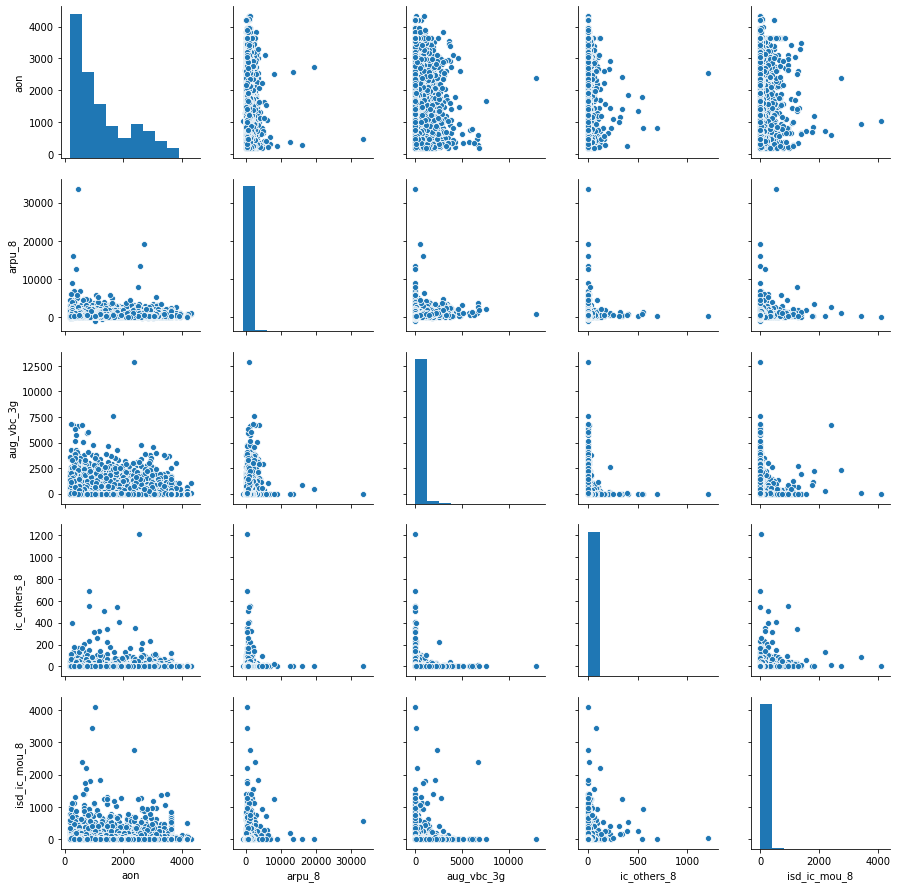

In [70]:
# Pairplot for the numerical variables
plt.figure(figsize=[16,10])
sns.pairplot(HVC, vars=['aon','arpu_8','aug_vbc_3g','ic_others_8','isd_ic_mou_8'])
plt.show()

<Figure size 1152x720 with 0 Axes>

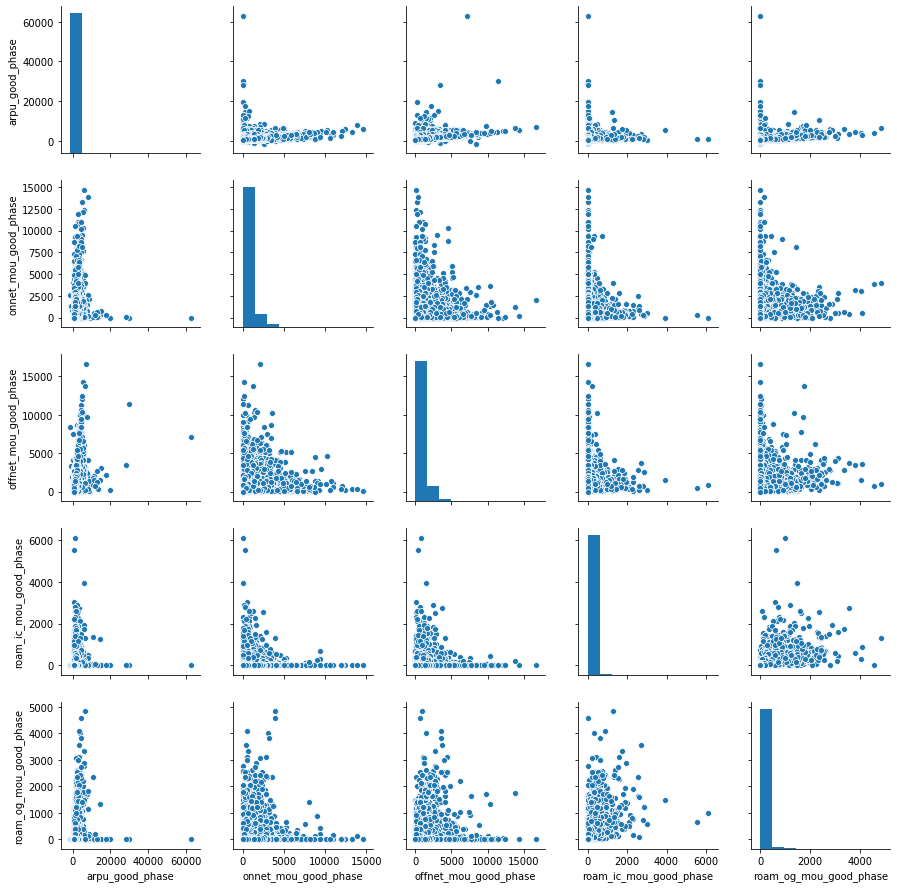

In [71]:
# Pairplot for the numerical variables
plt.figure(figsize=[16,10])
sns.pairplot(HVC, vars=['arpu_good_phase','onnet_mou_good_phase','offnet_mou_good_phase','roam_ic_mou_good_phase','roam_og_mou_good_phase'])
plt.show()

<Figure size 1152x720 with 0 Axes>

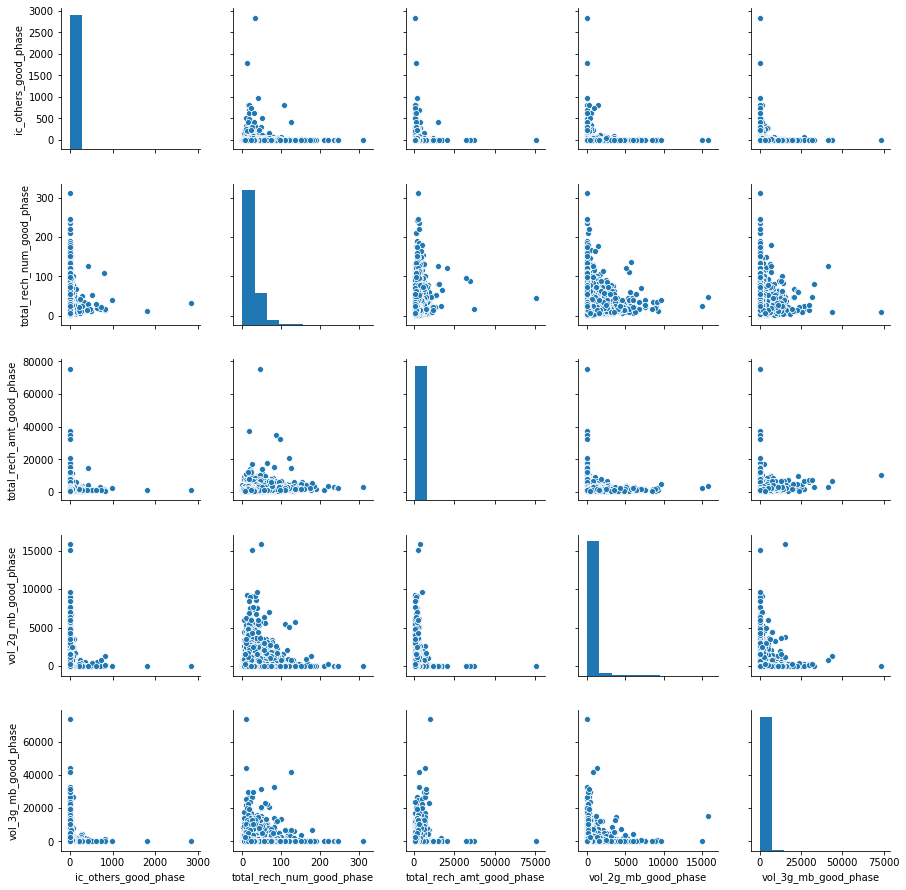

In [72]:
# Pairplot for the numerical variables
plt.figure(figsize=[16,10])
sns.pairplot(HVC, vars=['ic_others_good_phase','total_rech_num_good_phase','total_rech_amt_good_phase','vol_2g_mb_good_phase','vol_3g_mb_good_phase'])
plt.show()

So, we see from the pair lots for some of the numerical variables that these variables are correlated with each other. Now, we see if these numerical columns contain any outliers or not

In [73]:
HVC[num_vars].describe(percentiles=[.25,.5,.75,.90,.95,.995])

aon        arpu_8    aug_vbc_3g   ic_others_8  isd_ic_mou_8  \
count  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   
mean    1264.064776    534.857433    129.439626      1.237756     11.700835   
std      975.263117    492.259586    390.478591     12.889879     74.928607   
min      180.000000   -945.808000      0.000000      0.000000      0.000000   
25%      480.000000    289.609500      0.000000      0.000000      0.000000   
50%      914.000000    452.091000      0.000000      0.000000      0.000000   
75%     1924.000000    671.150000      1.600000      0.060000      0.000000   
90%     2846.000000    985.202000    438.970000      1.230000     15.330000   
95%     3179.000000   1258.555500    818.750000      3.930000     46.485000   
99.5%   3651.000000   2410.032600   2377.076000     39.276000    434.740000   
max     4321.000000  33543.624000  12916.220000   1209.860000   4100.380000   

       isd_og_mou_8    jul_vbc_3g    jun_vbc_3g  last_day_rch_amt_6  \
count  30011.000000  30011.000000  30011.000000        30011.000000   
mean       2.029314    135.127102    121.360548          104.485655   
std       44.794926    408.024394    389.726031          142.767207   
min        0.000000      0.000000      0.000000            0.000000   
25%        0.000000      0.000000      0.000000           30.000000   
50%        0.000000      0.000000      0.000000          110.000000   
75%        0.000000      1.990000      0.000000          120.000000   
90%        0.000000    454.830000    394.500000          250.000000   
95%        0.550000    845.315000    761.740000          252.000000   
99.5%     93.496500   2514.395000   2379.853500         1000.000000   
max     5681.540000   9165.600000  11166.210000         4010.000000   

       last_day_rch_amt_7  last_day_rch_amt_8  loc_ic_mou_8  loc_ic_t2f_mou_8  \
count        30011.000000        30011.000000  30011.000000      30011.000000   
mean           105.287128           95.653294    234.281577         14.706512   
std            141.148386          145.260363    307.043800         43.714061   
min              0.000000            0.000000      0.000000          0.000000   
25%             27.000000            0.000000     49.985000          0.000000   
50%             98.000000           50.000000    142.840000          1.850000   
75%            130.000000          130.000000    302.110000         11.605000   
90%            250.000000          225.000000    549.790000         37.190000   
95%            274.000000          252.000000    767.310000         67.560000   
99.5%         1000.000000          951.000000   1876.233500        272.277500   
max           4010.000000         4449.000000   5748.810000       1588.530000   

       loc_ic_t2m_mou_8  loc_ic_t2o_mou  loc_ic_t2t_mou_8  loc_og_mou_8  \
count      30011.000000         30011.0      30011.000000  30011.000000   
mean         153.628517             0.0         65.936968    261.233938   
std          217.026349             0.0        155.702334    366.539171   
min            0.000000             0.0          0.000000      0.000000   
25%           29.660000             0.0          6.810000     38.270000   
50%           89.810000             0.0         26.840000    148.280000   
75%          196.975000             0.0         70.330000    348.310000   
90%          360.540000             0.0        148.140000    633.340000   
95%          516.675000             0.0        232.495000    883.250000   
99.5%       1282.164500             0.0        960.495500   2063.124000   
max         5738.460000             0.0       4003.210000  11039.910000   

       loc_og_t2c_mou_8  loc_og_t2f_mou_8  loc_og_t2m_mou_8  loc_og_t2o_mou  \
count      30011.000000      30011.000000      30011.000000         30011.0   
mean           1.712739          6.494314        167.591199             0.0   
std            7.397562         20.220028        234.862468             0.0   
min            0.000000 

From the statistical analysis we see that almost all variables contain outliers. Hence, we need to remove these outliers

In [74]:
def cap_data(df):
    for col in df.columns:
#        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

HVC=cap_data(HVC)

In [75]:
HVC[num_vars].describe(percentiles=[.25,.5,.75,.90,.95,.99])

aon        arpu_8    aug_vbc_3g   ic_others_8  isd_ic_mou_8  \
count  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   
mean    1263.367832    524.418269    120.429564      0.749592      8.499376   
std      973.221741    370.677425    318.459109      2.900702     33.201557   
min      189.000000      0.000000      0.000000      0.000000      0.000000   
25%      480.000000    289.609500      0.000000      0.000000      0.000000   
50%      914.000000    452.091000      0.000000      0.000000      0.000000   
75%     1924.000000    671.150000      1.600000      0.060000      0.000000   
90%     2846.000000    985.202000    438.970000      1.230000     15.330000   
95%     3179.000000   1258.555500    818.750000      3.930000     46.485000   
99%     3651.000000   1987.827660   1821.732500     21.530000    249.868200   
max     3651.000000   1987.934400   1822.115000     21.530000    249.888000   

       isd_og_mou_8    jul_vbc_3g    jun_vbc_3g  last_day_rch_amt_6  \
count  30011.000000  30011.000000  30011.000000        30011.000000   
mean       0.554784    126.036879    112.177812          100.313818   
std        3.595169    337.180897    312.975849          109.336450   
min        0.000000      0.000000      0.000000            0.000000   
25%        0.000000      0.000000      0.000000           30.000000   
50%        0.000000      0.000000      0.000000          110.000000   
75%        0.000000      1.990000      0.000000          120.000000   
90%        0.000000    454.830000    394.500000          250.000000   
95%        0.550000    845.315000    761.740000          252.000000   
99%       31.240000   1941.443200   1866.112400          655.000000   
max       31.240000   1941.598000   1866.386000          655.000000   

       last_day_rch_amt_7  last_day_rch_amt_8  loc_ic_mou_8  loc_ic_t2f_mou_8  \
count        30011.000000        30011.000000  30011.000000      30011.000000   
mean           101.440972           91.667555    228.040266         13.262052   
std            112.443354          110.324508    265.347318         29.300255   
min              0.000000            0.000000      0.000000          0.000000   
25%             27.000000            0.000000     49.985000          0.000000   
50%             98.000000           50.000000    142.840000          1.850000   
75%            130.000000          130.000000    302.110000         11.605000   
90%            250.000000          225.000000    549.790000         37.190000   
95%            274.000000          252.000000    767.310000         67.560000   
99%            655.000000          619.000000   1459.483700        185.566000   
max            655.000000          619.000000   1459.553000        185.620000   

       loc_ic_t2m_mou_8  loc_ic_t2o_mou  loc_ic_t2t_mou_8  loc_og_mou_8  \
count      30011.000000         30011.0      30011.000000  30011.000000   
mean         148.449001             0.0         59.902913    254.096310   
std          178.640245             0.0         96.099635    312.950064   
min            0.000000             0.0          0.000000      0.000000   
25%           29.660000             0.0          6.810000     38.270000   
50%           89.810000             0.0         26.840000    148.280000   
75%          196.975000             0.0         70.330000    348.310000   
90%          360.540000             0.0        148.140000    633.340000   
95%          516.675000             0.0        232.495000    883.250000   
99%          976.055900             0.0        621.601300   1689.005100   
max          976.091000             0.0        621.667000   1689.069000   

       loc_og_t2c_mou_8  loc_og_t2f_mou_8  loc_og_t2m_mou_8  loc_og_t2o_mou  \
count      30011.000000      30011.000000      30011.000000         30011.0   
mean           1.473665          5.889841        163.125580             0.0   
std            4.430822         13.917091        205.616691             0.0   
min            0.000000 

The outliers are now removed

Also we can see that these below fields contain only one value for all the records and hence are not significant for our analysis. Hence we remove these columns mentioned below:

- loc_ic_t2o_mou
- loc_og_t2o_mou
- std_ic_t2o_mou_8
- std_og_t2c_mou_8
- std_og_t2o_mou
- std_og_t2c_mou_good_phase
- std_ic_t2o_mou_good_phase
- og_others_8

In [76]:
no_vars = ['og_others_8','loc_ic_t2o_mou','loc_og_t2o_mou','std_ic_t2o_mou_8','std_og_t2c_mou_8','std_og_t2o_mou','std_og_t2c_mou_good_phase','std_ic_t2o_mou_good_phase']
HVC = HVC.drop(no_vars, axis=1)
HVC.head()

mobile_number     arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
7    7.000702e+09  1987.9344        52.29        325.91          31.64   
8    7.001525e+09   137.3620        35.08        136.48           0.00   
13   7.002192e+09   593.2600       534.24        482.46          72.11   
16   7.000876e+09   187.8940        70.61        162.76           0.00   
17   7.000187e+09    25.4990         7.79          5.54           4.81   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
7           38.06             40.28            162.28             53.23   
8            0.00             12.49             50.54              0.00   
13           1.44             36.01            294.46             23.51   
16           0.00             67.38            128.28             10.26   
17          13.34              0.00              0.00              0.00   

    loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  \
7               0.00        255.79             12.01             49.14   
8               7.15         63.04             22.58             75.69   
13              0.49        353.99            498.23            156.94   
16              0.00        205.93              3.23             18.29   
17              0.00          0.00              0.00              0.00   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  \
7              16.68         77.84         10.01          6.50   
8               0.00         98.28          0.00         10.23   
13              0.00        655.18          1.29          4.78   
16              0.00         21.53          0.00          5.91   
17              0.00          0.00          0.00          0.00   

    total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
7           350.16             27.31            121.19             39.53   
8           171.56              0.31             15.48              0.00   
13         1015.26             52.58            195.18              7.49   
16          233.38             28.89            150.16             32.71   
17            0.00              0.00              0.00              0.00   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
7         188.04             30.39            141.33             22.21   
8          15.79              0.10              0.65              0.00   
13        255.26            154.58            317.91              1.91   
16        211.78              6.33             73.93              2.18   
17          0.00              0.00              0.00              0.00   

    std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
7         193.94          428.74           0.0        31.590        15.14   
8           0.75           16.54           0.0         0.000         0.00   
13        474.41         1144.53           0.0       249.888        21.44   
16         82.44          294.46           0.0         0.230         0.00   
17          0.00            0.00           0.0         0.000         0.00   

    total_rech_num_8  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  \
7                  7            2341.9            1000             790   
8                 14             120.0              90             154   
13                11             717.0             110             110   
16                 2             160.0             110             110   
17                 4              30.0             110               0   

    max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
7              951                   0                   0   
8               30                  50                   0   
13             130                 110                  50   
16             130                 100                 100   
17              30                  30                   0   

    last_day_rch_amt_8  vol_2g_mb_8  vol_3g_mb_8  night_pck_user_6  \
7            

In [77]:
for i in no_vars:
    num_vars.remove(i)

### Creating dummy variables for categorical 

In [78]:
#Bivariate Analysis with respective churn through boxplot (categorical variables)
##sns.boxplot(var1, var2)

In [79]:
temp_df = HVC[cat_vars]
temp_df.head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  monthly_2g_6  \
7                0.0               0.0               0.0             0   
8                0.0               0.0               0.0             0   
13               0.0               0.0               0.0             0   
16               0.0               0.0               0.0             0   
17               0.0               0.0               0.0             0   

    monthly_2g_7  monthly_2g_8  monthly_3g_6  monthly_3g_7  monthly_3g_8  \
7              0             0             0             0             0   
8              1             0             0             0             0   
13             0             0             0             0             0   
16             0             0             0             0             0   
17             0             0             0             0             0   

    fb_user_6  fb_user_7  fb_user_8  
7         0.0        0.0        0.0  
8         0.0        1.0        1.0  
13        0.0        0.0        1.0  
16        0.0        0.0        0.0  
17        0.0        0.0        0.0

In [80]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 12 columns):
night_pck_user_6    30011 non-null float64
night_pck_user_7    30011 non-null float64
night_pck_user_8    30011 non-null float64
monthly_2g_6        30011 non-null int64
monthly_2g_7        30011 non-null int64
monthly_2g_8        30011 non-null int64
monthly_3g_6        30011 non-null int64
monthly_3g_7        30011 non-null int64
monthly_3g_8        30011 non-null int64
fb_user_6           30011 non-null float64
fb_user_7           30011 non-null float64
fb_user_8           30011 non-null float64
dtypes: float64(6), int64(6)
memory usage: 4.2 MB


So, from the above info we see that some of the variables are of float type and some are of int type. We convert the float types to int type for our ease.

In [81]:
temp_df['night_pck_user_6'] = temp_df['night_pck_user_6'].astype('int64')
temp_df['night_pck_user_7'] = temp_df['night_pck_user_6'].astype('int64')
temp_df['night_pck_user_8'] = temp_df['night_pck_user_6'].astype('int64')
temp_df['fb_user_6'] = temp_df['fb_user_6'].astype('int64')
temp_df['fb_user_7'] = temp_df['fb_user_7'].astype('int64')
temp_df['fb_user_8'] = temp_df['fb_user_8'].astype('int64')

In [82]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 12 columns):
night_pck_user_6    30011 non-null int64
night_pck_user_7    30011 non-null int64
night_pck_user_8    30011 non-null int64
monthly_2g_6        30011 non-null int64
monthly_2g_7        30011 non-null int64
monthly_2g_8        30011 non-null int64
monthly_3g_6        30011 non-null int64
monthly_3g_7        30011 non-null int64
monthly_3g_8        30011 non-null int64
fb_user_6           30011 non-null int64
fb_user_7           30011 non-null int64
fb_user_8           30011 non-null int64
dtypes: int64(12)
memory usage: 4.2 MB


Naming categories for the categorical variables where there are more than two categories

In [83]:
temp_df['monthly_2g_6'] = temp_df.monthly_2g_6.map({0:'type_0', 1:'type_1', 2:'type_2'})
temp_df['monthly_2g_7'] = temp_df.monthly_2g_7.map({0:'type_0', 1:'type_1', 2:'type_2'})
temp_df['monthly_2g_8'] = temp_df.monthly_2g_8.map({0:'type_0', 1:'type_1', 2:'type_2'})
temp_df['monthly_3g_6'] = temp_df.monthly_3g_6.map({0:'type_0', 1:'type_1', 2:'type_2', 3:'type_3'})
temp_df['monthly_3g_7'] = temp_df.monthly_3g_7.map({0:'type_0', 1:'type_1', 2:'type_2', 3:'type_3'})
temp_df['monthly_3g_8'] = temp_df.monthly_3g_8.map({0:'type_0', 1:'type_1', 2:'type_2', 3:'type_3'})

In [84]:
temp_df.head()

night_pck_user_6  night_pck_user_7  night_pck_user_8 monthly_2g_6  \
7                  0                 0                 0       type_0   
8                  0                 0                 0       type_0   
13                 0                 0                 0       type_0   
16                 0                 0                 0       type_0   
17                 0                 0                 0       type_0   

   monthly_2g_7 monthly_2g_8 monthly_3g_6 monthly_3g_7 monthly_3g_8  \
7        type_0       type_0       type_0       type_0       type_0   
8        type_1       type_0       type_0       type_0       type_0   
13       type_0       type_0       type_0       type_0       type_0   
16       type_0       type_0       type_0       type_0       type_0   
17       type_0       type_0       type_0       type_0       type_0   

    fb_user_6  fb_user_7  fb_user_8  
7           0          0          0  
8           0          1          1  
13          0          0          1  
16          0          0          0  
17          0          0          0

Now, we create dummy variables for these categorical variables 

In [85]:
temp_df = pd.get_dummies(temp_df, drop_first=True)
temp_df.head()

night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
7                  0                 0                 0          0   
8                  0                 0                 0          0   
13                 0                 0                 0          0   
16                 0                 0                 0          0   
17                 0                 0                 0          0   

    fb_user_7  fb_user_8  monthly_2g_6_type_1  monthly_2g_6_type_2  \
7           0          0                    0                    0   
8           1          1                    0                    0   
13          0          1                    0                    0   
16          0          0                    0                    0   
17          0          0                    0                    0   

    monthly_2g_7_type_1  monthly_2g_7_type_2  monthly_2g_8_type_1  \
7                     0                    0                    0   
8                     1                    0                    0   
13                    0                    0                    0   
16                    0                    0                    0   
17                    0                    0                    0   

    monthly_2g_8_type_2  monthly_3g_6_type_1  monthly_3g_6_type_2  \
7                     0                    0                    0   
8                     0                    0                    0   
13                    0                    0                    0   
16                    0                    0                    0   
17                    0                    0                    0   

    monthly_3g_6_type_3  monthly_3g_7_type_1  monthly_3g_7_type_2  \
7                     0                    0                    0   
8                     0                    0                    0   
13                    0                    0                    0   
16                    0                    0                    0   
17                    0                    0                    0   

    monthly_3g_7_type_3  monthly_3g_8_type_1  monthly_3g_8_type_2  \
7                     0                    0                    0   
8                     0                    0                    0   
13                    0                    0                    0   
16                    0                    0                    0   
17                    0                    0                    0   

    monthly_3g_8_type_3  
7                     0  
8                     0  
13                    0  
16                    0  
17                    0

So now, we have some new set of fields which are categorical in nature but some of them are dummified. We now get these columns as a cat_vars list

In [86]:
cat_vars = temp_df.columns
cat_vars

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'monthly_2g_6_type_1', 'monthly_2g_6_type_2',
       'monthly_2g_7_type_1', 'monthly_2g_7_type_2', 'monthly_2g_8_type_1',
       'monthly_2g_8_type_2', 'monthly_3g_6_type_1', 'monthly_3g_6_type_2',
       'monthly_3g_6_type_3', 'monthly_3g_7_type_1', 'monthly_3g_7_type_2',
       'monthly_3g_7_type_3', 'monthly_3g_8_type_1', 'monthly_3g_8_type_2',
       'monthly_3g_8_type_3'],
      dtype='object')

Now, we need to concatenate these variables with the main dataframe (HVC) and also we need to drop the original columns for which dummification has been actually performed. The variables that we need to drop from HVC is as below:
- monthly_2g_6
- monthly_2g_7
- monthly_2g_8
- monthly_3g_6
- monthly_3g_7
- monthly_3g_8
- fb_user_6
- fb_user_7
- fb_user_8
- night_pck_user_6
- night_pck_user_7
- night_pck_user_8

In [87]:
# Concatenating the temp_df dataframe with HVC
HVC = pd.concat([HVC, temp_df], axis=1)
HVC.head()

mobile_number     arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
7    7.000702e+09  1987.9344        52.29        325.91          31.64   
8    7.001525e+09   137.3620        35.08        136.48           0.00   
13   7.002192e+09   593.2600       534.24        482.46          72.11   
16   7.000876e+09   187.8940        70.61        162.76           0.00   
17   7.000187e+09    25.4990         7.79          5.54           4.81   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
7           38.06             40.28            162.28             53.23   
8            0.00             12.49             50.54              0.00   
13           1.44             36.01            294.46             23.51   
16           0.00             67.38            128.28             10.26   
17          13.34              0.00              0.00              0.00   

    loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  \
7               0.00        255.79             12.01             49.14   
8               7.15         63.04             22.58             75.69   
13              0.49        353.99            498.23            156.94   
16              0.00        205.93              3.23             18.29   
17              0.00          0.00              0.00              0.00   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  \
7              16.68         77.84         10.01          6.50   
8               0.00         98.28          0.00         10.23   
13              0.00        655.18          1.29          4.78   
16              0.00         21.53          0.00          5.91   
17              0.00          0.00          0.00          0.00   

    total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
7           350.16             27.31            121.19             39.53   
8           171.56              0.31             15.48              0.00   
13         1015.26             52.58            195.18              7.49   
16          233.38             28.89            150.16             32.71   
17            0.00              0.00              0.00              0.00   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
7         188.04             30.39            141.33             22.21   
8          15.79              0.10              0.65              0.00   
13        255.26            154.58            317.91              1.91   
16        211.78              6.33             73.93              2.18   
17          0.00              0.00              0.00              0.00   

    std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
7         193.94          428.74           0.0        31.590        15.14   
8           0.75           16.54           0.0         0.000         0.00   
13        474.41         1144.53           0.0       249.888        21.44   
16         82.44          294.46           0.0         0.230         0.00   
17          0.00            0.00           0.0         0.000         0.00   

    total_rech_num_8  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  \
7                  7            2341.9            1000             790   
8                 14             120.0              90             154   
13                11             717.0             110             110   
16                 2             160.0             110             110   
17                 4              30.0             110               0   

    max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
7              951                   0                   0   
8               30                  50                   0   
13             130                 110                  50   
16             130                 100                 100   
17              30                  30                   0   

    last_day_rch_amt_8  vol_2g_mb_8  vol_3g_mb_8  night_pck_user_6  \
7            

In [88]:
# Dropping the above mentioned variables from HVC
HVC = HVC.drop(['fb_user_6','fb_user_7','fb_user_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8'], axis=1)
HVC.head()

mobile_number     arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
7    7.000702e+09  1987.9344        52.29        325.91          31.64   
8    7.001525e+09   137.3620        35.08        136.48           0.00   
13   7.002192e+09   593.2600       534.24        482.46          72.11   
16   7.000876e+09   187.8940        70.61        162.76           0.00   
17   7.000187e+09    25.4990         7.79          5.54           4.81   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
7           38.06             40.28            162.28             53.23   
8            0.00             12.49             50.54              0.00   
13           1.44             36.01            294.46             23.51   
16           0.00             67.38            128.28             10.26   
17          13.34              0.00              0.00              0.00   

    loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  \
7               0.00        255.79             12.01             49.14   
8               7.15         63.04             22.58             75.69   
13              0.49        353.99            498.23            156.94   
16              0.00        205.93              3.23             18.29   
17              0.00          0.00              0.00              0.00   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  \
7              16.68         77.84         10.01          6.50   
8               0.00         98.28          0.00         10.23   
13              0.00        655.18          1.29          4.78   
16              0.00         21.53          0.00          5.91   
17              0.00          0.00          0.00          0.00   

    total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
7           350.16             27.31            121.19             39.53   
8           171.56              0.31             15.48              0.00   
13         1015.26             52.58            195.18              7.49   
16          233.38             28.89            150.16             32.71   
17            0.00              0.00              0.00              0.00   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
7         188.04             30.39            141.33             22.21   
8          15.79              0.10              0.65              0.00   
13        255.26            154.58            317.91              1.91   
16        211.78              6.33             73.93              2.18   
17          0.00              0.00              0.00              0.00   

    std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
7         193.94          428.74           0.0        31.590        15.14   
8           0.75           16.54           0.0         0.000         0.00   
13        474.41         1144.53           0.0       249.888        21.44   
16         82.44          294.46           0.0         0.230         0.00   
17          0.00            0.00           0.0         0.000         0.00   

    total_rech_num_8  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  \
7                  7            2341.9            1000             790   
8                 14             120.0              90             154   
13                11             717.0             110             110   
16                 2             160.0             110             110   
17                 4              30.0             110               0   

    max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
7              951                   0                   0   
8               30                  50                   0   
13             130                 110                  50   
16             130                 100                 100   
17              30                  30                   0   

    last_day_rch_amt_8  vol_2g_mb_8  vol_3g_mb_8  sachet_2g_6  sachet_2g_7  \
7    

# Train Test Split

In [89]:
# Putting feature variable to X
X = HVC.drop(['churn','mobile_number'], axis=1)

X.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
7   1987.9344        52.29        325.91          31.64          38.06   
8    137.3620        35.08        136.48           0.00           0.00   
13   593.2600       534.24        482.46          72.11           1.44   
16   187.8940        70.61        162.76           0.00           0.00   
17    25.4990         7.79          5.54           4.81          13.34   

    loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
7              40.28            162.28             53.23              0.00   
8              12.49             50.54              0.00              7.15   
13             36.01            294.46             23.51              0.49   
16             67.38            128.28             10.26              0.00   
17              0.00              0.00              0.00              0.00   

    loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
7         255.79             12.01             49.14             16.68   
8          63.04             22.58             75.69              0.00   
13        353.99            498.23            156.94              0.00   
16        205.93              3.23             18.29              0.00   
17          0.00              0.00              0.00              0.00   

    std_og_mou_8  isd_og_mou_8  spl_og_mou_8  total_og_mou_8  \
7          77.84         10.01          6.50          350.16   
8          98.28          0.00         10.23          171.56   
13        655.18          1.29          4.78         1015.26   
16         21.53          0.00          5.91          233.38   
17          0.00          0.00          0.00            0.00   

    loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
7              27.31            121.19             39.53        188.04   
8               0.31             15.48              0.00         15.79   
13             52.58            195.18              7.49        255.26   
16             28.89            150.16             32.71        211.78   
17              0.00              0.00              0.00          0.00   

    std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
7              30.39            141.33             22.21        193.94   
8               0.10              0.65              0.00          0.75   
13            154.58            317.91              1.91        474.41   
16              6.33             73.93              2.18         82.44   
17              0.00              0.00              0.00          0.00   

    total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
7           428.74           0.0        31.590        15.14                 7   
8            16.54           0.0         0.000         0.00                14   
13         1144.53           0.0       249.888        21.44                11   
16          294.46           0.0         0.230         0.00                 2   
17            0.00           0.0         0.000         0.00                 4   

    total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  \
7             2341.9            1000             790             951   
8              120.0              90             154              30   
13             717.0             110             110             130   
16             160.0             110             110             130   
17              30.0             110               0              30   

    last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8  vol_2g_mb_8  \
7                    0                   0                 619         0.00   
8                   50                   0                  10         0.03   
13                 110                  50                   0         0.02   
16                 100                 100                 130         0.00   
17                  30                   0                

In [90]:
# Putting response variable to y
y = HVC[['churn','mobile_number']]

y.head()

churn  mobile_number
7       1   7.000702e+09
8       0   7.001525e+09
13      0   7.002192e+09
16      0   7.000876e+09
17      0   7.000187e+09

In [91]:
# Splitting the data into train and test
X_train, X_test, y_train_temp, y_test_temp = train_test_split(X, y, train_size=0.7, random_state=42)

In [92]:
y_train = y_train_temp.drop('mobile_number', axis=1)
y_test = y_test_temp.drop('mobile_number', axis=1)

# Feature Scaling

In [93]:
scaler = StandardScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
337   -0.685804    -0.549937     -0.727019      -0.265244      -0.282351   
20790 -0.311193    -0.265165      0.170833      -0.265244      -0.282351   
42083 -0.205011    -0.643299     -0.894693      -0.265244      -0.282351   
95072  0.243192     1.214412     -0.797978      -0.265244      -0.282351   
64915 -0.027432    -0.268313     -0.246881      -0.265244      -0.282351   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
337           -0.282646         -0.573838          0.982967         -0.332277   
20790         -0.350089         -0.500070         -0.423672         -0.199594   
42083         -0.539136         -0.791281         -0.423672         -0.332277   
95072         -0.280847         -0.598655         -0.423672         -0.332277   
64915          0.491046          0.464916         -0.386750         -0.332277   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
337       -0.485075         -0.465337         -0.506603          0.603628   
20790     -0.530255         -0.113103          0.550146         -0.241318   
42083     -0.809030         -0.465337         -0.506603         -0.241318   
95072     -0.562833          1.543177         -0.506603         -0.241318   
64915      0.494708         -0.465337         -0.487510         -0.241318   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8  total_og_mou_8  \
337       -0.619888     -0.152579     -0.489576       -0.817526   
20790      0.251711      0.943915      0.698176       -0.041135   
42083     -0.627982     -0.152579     -0.489576       -0.988375   
95072      0.657648     -0.152579     -0.489576        0.271025   
64915     -0.616162     -0.152579     -0.489576       -0.319106   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
337           -0.497469         -0.347201         -0.096448     -0.449089   
20790         -0.245658          0.538981         -0.448079      0.198688   
42083          0.401992         -0.725138         -0.399683     -0.412515   
95072         -0.408958         -0.450356          1.246791     -0.336417   
64915          1.800049          1.159208          2.555170      1.690311   

       std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
337           -0.383829         -0.468641          0.123056     -0.467696   
20790         -0.369275         -0.399018         -0.279057     -0.448865   
42083         -0.383829         -0.468641         -0.279057     -0.499778   
95072         -0.343332         -0.347023          0.165307     -0.370055   
64915         -0.350609         -0.456177          1.241978     -0.358082   

       total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
337         -0.528541     -0.256741      0.037034    -0.259688   
20790        0.267591      2.221459      2.378019     0.100633   
42083       -0.536937     -0.256741     -0.253008    -0.259688   
95072       -0.414065     -0.256741     -0.025530    -0.259688   
64915        1.264855     -0.256741     -0.238430    -0.259688   

       total_rech_num_8  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  \
337           -0.695801         -0.606481        0.193764        0.161787   
20790          0.224943         -0.535205       -0.389284       -0.275819   
42083         -0.695801         -0.103094        0.551543        0.509298   
95072          0.224943          0.284468       -0.157390       -0.147111   
64915         -0.695801          0.035003        1.035208       -0.121369   

       max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
337          0.262354            0.086244            0.248504   
20790       -0.208397           -0.923728            0.248504   
42083        0.636187            1.390026           -0.899076   
95072       -0.104555           -0.923728            0.425055   
64915        0.026978            2.060280            0.460365   

       last_day_rch_am

## Checking the churn rate

In [94]:
### Checking the Churn Rate
Churn_rate = (sum(HVC['churn'])/len(HVC['churn'].index))*100
Churn_rate

8.64016527273333

So, the churn rate is less than 9% for the high value customers

Since the number of variables is very high, discrading variables based on correlatiom matrix is not feasible.

# Model Building

### Feature Selection using RFE

In [95]:
logreg = LogisticRegression(class_weight='balanced')

In [96]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [97]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False,  True, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False,  True,  True, False])

In [98]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 33),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', False, 8),
 ('roam_ic_mou_8', False, 76),
 ('roam_og_mou_8', False, 21),
 ('loc_og_t2t_mou_8', False, 38),
 ('loc_og_t2m_mou_8', False, 52),
 ('loc_og_t2f_mou_8', False, 65),
 ('loc_og_t2c_mou_8', False, 53),
 ('loc_og_mou_8', False, 70),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_8', False, 43),
 ('std_og_mou_8', True, 1),
 ('isd_og_mou_8', False, 81),
 ('spl_og_mou_8', False, 71),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', False, 12),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', False, 16),
 ('loc_ic_mou_8', False, 17),
 ('std_ic_t2t_mou_8', False, 47),
 ('std_ic_t2m_mou_8', False, 48),
 ('std_ic_t2f_mou_8', False, 45),
 ('std_ic_mou_8', False, 13),
 ('total_ic_mou_8', False, 49),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 83),
 ('ic_others_8', False, 74),
 ('total_rech_num_8', False, 3),
 ('total_rech_amt_8', False, 57),
 ('max_rech_amt_6', False, 3

In [99]:
rfe_col = X_train.columns[rfe.support_]

Selecting all the variables and creating a list to use them for further use.

### Assessing the model with StatsModels

In [100]:
X_train_sm = sm.add_constant(X_train[rfe_col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4220.7
Date:                Mon, 31 Aug 2020   Deviance:                       8441.4
Time:                        21:50:13   Pearson chi2:                 2.55e+06
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.8426      0.075    -51.560      0.000      -3.989      -3.696
onnet_mou_8                   0.0392      0.170      0.231      0.817      -0.293       0.371
std_og_t2t_mou_8             -2.1295      0.229     -9.309      0.000      -2.578      -1.681
std_og_t2m_mou_8             -2.0828      0.185    -11.241      0.000      -2.446      -1.720
std_og_mou_8                  4.8085      0.351     13.697      0.000       4.120       5.497
total_og_mou_8               -2.9603      0.236    -12.555      0.000      -3.422      -2.498
loc_ic_t2m_mou_8             -2.0819      0.139    -14.992      0.000      -2.354      -1.810
spl_ic_mou_8                 -0.6610      0.092     -7.203      0.000      -0.841      -0.481
onnet_mou_good_phase          0.6256      0.094      6.673      0.000       0.442       0.809
offnet_mou_good_phase         0.7151      0.090      7.908      0.000       0.538       0.892
total_og_mou_good_phase      -0.4226      0.121     -3.484      0.000      -0.660      -0.185
loc_ic_t2m_mou_good_phase     0.4711      0.054      8.778      0.000       0.366       0.576
monthly_2g_8_type_1          -1.8135      0.214     -8.476      0.000      -2.233      -1.394
monthly_2g_8_type_2         -22.9857   1.29e+04     -0.002      0.999   -2.53e+04    2.52e+04
monthly_3g_8_type_1          -1.2591      0.167     -7.522      0.000      -1.587      -0.931
monthly_3g_8_type_2          -2.0589      0.395     -5.219      0.000      -2.832      -1.286
=============================================================================================
"""

We see that there are some variables which are statistically insignificant. So, we need to check he VIF value for these variab;es. Before doing this, lets predict for the test set and evaluate the model

In [101]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

337      0.030797
20790    0.002089
42083    0.034862
95072    0.006717
64915    0.000397
98518    0.000039
50384    0.054357
41066    0.102783
50633    0.000303
3164     0.424885
dtype: float64

Predited for the test set.

Now, we create a DataFrame with the predicted churn rate to evaluate:

In [102]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.churn, 'Churn_Prob':y_train_pred})
y_train_pred_final['Mobile Number'] = y_train_temp.mobile_number
y_train_pred_final.head()

Churn  Churn_Prob  Mobile Number
337        0    0.030797   7.000167e+09
20790      0    0.002089   7.001343e+09
42083      0    0.034862   7.001863e+09
95072      0    0.006717   7.002276e+09
64915      0    0.000397   7.001086e+09

#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [103]:
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  Mobile Number  Predicted
337        0    0.030797   7.000167e+09          0
20790      0    0.002089   7.001343e+09          0
42083      0    0.034862   7.001863e+09          0
95072      0    0.006717   7.002276e+09          0
64915      0    0.000397   7.001086e+09          0

We create the confusion matrix so that we can check different evaluation metrics:

In [104]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted )
print(confusion)

[[18964   223]
 [ 1472   348]]


In [105]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))

0.9193126100823535


In [106]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
TP / float(TP+FN)

0.1912087912087912

The accuracy of the model is more than 90% but the sensitivity of th model is as low as 19%. So this model needs tunning.

Hence, we use VIF to check the intercoliearity between the variables of the model.

## Using VIF, we further tune the model

In [107]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                std_og_mou_8  68.80
1            std_og_t2t_mou_8  34.66
2            std_og_t2m_mou_8  27.35
9     total_og_mou_good_phase  26.23
7        onnet_mou_good_phase  15.74
8       offnet_mou_good_phase  14.15
0                 onnet_mou_8  12.13
4              total_og_mou_8  11.28
5            loc_ic_t2m_mou_8   3.77
10  loc_ic_t2m_mou_good_phase   3.42
6                spl_ic_mou_8   1.02
11        monthly_2g_8_type_1   1.02
13        monthly_3g_8_type_1   1.02
14        monthly_3g_8_type_2   1.01
12        monthly_2g_8_type_2   1.00

There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'std_og_mou_8' has the highest VIF. So let's start by dropping that.

In [108]:
#Dropping 'std_og_mou_8' from rfe_col
rfe_col = rfe_col.drop('std_og_mou_8', 1)
rfe_col

Index(['onnet_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'total_og_mou_8',
       'loc_ic_t2m_mou_8', 'spl_ic_mou_8', 'onnet_mou_good_phase',
       'offnet_mou_good_phase', 'total_og_mou_good_phase',
       'loc_ic_t2m_mou_good_phase', 'monthly_2g_8_type_1',
       'monthly_2g_8_type_2', 'monthly_3g_8_type_1', 'monthly_3g_8_type_2'],
      dtype='object')

After dropping the variable with highest VIF value, we run the model with reduced number of variables

In [109]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[rfe_col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20992
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4284.5
Date:                Mon, 31 Aug 2020   Deviance:                       8569.0
Time:                        21:50:15   Pearson chi2:                 1.81e+06
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.7979      0.073    -51.787      0.000      -3.942      -3.654
onnet_mou_8                  -0.1842      0.169     -1.093      0.274      -0.515       0.146
std_og_t2t_mou_8              0.6560      0.143      4.593      0.000       0.376       0.936
std_og_t2m_mou_8              0.4536      0.122      3.726      0.000       0.215       0.692
total_og_mou_8               -2.0054      0.205     -9.784      0.000      -2.407      -1.604
loc_ic_t2m_mou_8             -2.4342      0.140    -17.326      0.000      -2.710      -2.159
spl_ic_mou_8                 -0.6634      0.091     -7.252      0.000      -0.843      -0.484
onnet_mou_good_phase          0.6364      0.094      6.746      0.000       0.452       0.821
offnet_mou_good_phase         0.7149      0.090      7.914      0.000       0.538       0.892
total_og_mou_good_phase      -0.4295      0.122     -3.509      0.000      -0.669      -0.190
loc_ic_t2m_mou_good_phase     0.4975      0.054      9.217      0.000       0.392       0.603
monthly_2g_8_type_1          -1.7924      0.213     -8.408      0.000      -2.210      -1.375
monthly_2g_8_type_2         -22.9533   1.29e+04     -0.002      0.999   -2.53e+04    2.53e+04
monthly_3g_8_type_1          -1.2290      0.167     -7.361      0.000      -1.556      -0.902
monthly_3g_8_type_2          -2.0137      0.393     -5.124      0.000      -2.784      -1.243
=============================================================================================
"""

In [110]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([2.91063533e-02, 1.60617983e-03, 3.37472275e-02, 7.30717290e-03,
       3.60234587e-04, 2.46049919e-04, 6.52750564e-02, 1.03354582e-01,
       3.23389805e-04, 4.34626623e-01])

In [111]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.churn, 'Churn_Prob':y_train_pred})
y_train_pred_final['Mobile Number'] = y_train_temp.mobile_number
y_train_pred_final.head()

Churn  Churn_Prob  Mobile Number
337        0    0.029106   7.000167e+09
20790      0    0.001606   7.001343e+09
42083      0    0.033747   7.001863e+09
95072      0    0.007307   7.002276e+09
64915      0    0.000360   7.001086e+09

In [112]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  Mobile Number  Predicted
337        0    0.029106   7.000167e+09          0
20790      0    0.001606   7.001343e+09          0
42083      0    0.033747   7.001863e+09          0
95072      0    0.007307   7.002276e+09          0
64915      0    0.000360   7.001086e+09          0

After runnign model, we predic and taking 0.5 as the prediction threshold, we predict the churn rate. 

In [113]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted )
print(confusion)

[[18983   204]
 [ 1483   337]]


In [114]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))

0.9196934355214929


In [115]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
TP / float(TP+FN)

0.18516483516483517

We see that the overall accuracy increased a bit which means the model has actually increased

#### Checking the VIF again

In [116]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
8     total_og_mou_good_phase  25.68
6        onnet_mou_good_phase  15.50
7       offnet_mou_good_phase  13.71
0                 onnet_mou_8  11.55
3              total_og_mou_8  10.02
1            std_og_t2t_mou_8   4.45
2            std_og_t2m_mou_8   3.96
4            loc_ic_t2m_mou_8   3.70
9   loc_ic_t2m_mou_good_phase   3.42
5                spl_ic_mou_8   1.02
10        monthly_2g_8_type_1   1.02
12        monthly_3g_8_type_1   1.02
13        monthly_3g_8_type_2   1.01
11        monthly_2g_8_type_2   1.00

In [117]:
# Let's drop 'total_og_mou_good_phase' since it has a high correlatio with other variables
rfe_col = rfe_col.drop('total_og_mou_good_phase', 1)
rfe_col

Index(['onnet_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'total_og_mou_8',
       'loc_ic_t2m_mou_8', 'spl_ic_mou_8', 'onnet_mou_good_phase',
       'offnet_mou_good_phase', 'loc_ic_t2m_mou_good_phase',
       'monthly_2g_8_type_1', 'monthly_2g_8_type_2', 'monthly_3g_8_type_1',
       'monthly_3g_8_type_2'],
      dtype='object')

Again, after removing the variable with highest VIF, we run the model on existing variables:

In [118]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20993
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4290.6
Date:                Mon, 31 Aug 2020   Deviance:                       8581.2
Time:                        21:50:17   Pearson chi2:                 2.00e+06
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.8001      0.073    -51.777      0.000      -3.944      -3.656
onnet_mou_8                   0.0321      0.154      0.209      0.835      -0.270       0.334
std_og_t2t_mou_8              0.5541      0.136      4.083      0.000       0.288       0.820
std_og_t2m_mou_8              0.5231      0.122      4.297      0.000       0.285       0.762
total_og_mou_8               -2.1564      0.203    -10.621      0.000      -2.554      -1.758
loc_ic_t2m_mou_8             -2.4084      0.140    -17.182      0.000      -2.683      -2.134
spl_ic_mou_8                 -0.6677      0.092     -7.293      0.000      -0.847      -0.488
onnet_mou_good_phase          0.3268      0.033      9.813      0.000       0.262       0.392
offnet_mou_good_phase         0.4198      0.033     12.628      0.000       0.355       0.485
loc_ic_t2m_mou_good_phase     0.4791      0.054      8.934      0.000       0.374       0.584
monthly_2g_8_type_1          -1.7815      0.212     -8.407      0.000      -2.197      -1.366
monthly_2g_8_type_2         -22.9465   1.29e+04     -0.002      0.999   -2.53e+04    2.52e+04
monthly_3g_8_type_1          -1.2261      0.167     -7.353      0.000      -1.553      -0.899
monthly_3g_8_type_2          -2.0225      0.394     -5.138      0.000      -2.794      -1.251
=============================================================================================
"""

We see that there are two variables which statistically insignificant

In [119]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([2.98205656e-02, 1.63550333e-03, 3.43646744e-02, 7.41243700e-03,
       3.64785661e-04, 2.09874078e-04, 6.52627097e-02, 8.45299562e-02,
       3.14783317e-04, 4.32277628e-01])

In [120]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.churn, 'Churn_Prob':y_train_pred})
y_train_pred_final['Mobile Number'] = y_train_temp.mobile_number
y_train_pred_final.head()

Churn  Churn_Prob  Mobile Number
337        0    0.029821   7.000167e+09
20790      0    0.001636   7.001343e+09
42083      0    0.034365   7.001863e+09
95072      0    0.007412   7.002276e+09
64915      0    0.000365   7.001086e+09

In [121]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  Mobile Number  Predicted
337        0    0.029821   7.000167e+09          0
20790      0    0.001636   7.001343e+09          0
42083      0    0.034365   7.001863e+09          0
95072      0    0.007412   7.002276e+09          0
64915      0    0.000365   7.001086e+09          0

In [122]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted )
print(confusion)

[[18985   202]
 [ 1508   312]]


In [123]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))

0.9185985623839672


In [124]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
TP / float(TP+FN)

0.17142857142857143

Accuracy is still almost the same for the new model (here also we kept the threshold as 0.5)

#### Checking the VIFagain

In [125]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 onnet_mou_8  11.31
3              total_og_mou_8   9.65
1            std_og_t2t_mou_8   4.45
2            std_og_t2m_mou_8   3.92
4            loc_ic_t2m_mou_8   3.66
8   loc_ic_t2m_mou_good_phase   3.38
6        onnet_mou_good_phase   2.37
7       offnet_mou_good_phase   2.11
5                spl_ic_mou_8   1.02
9         monthly_2g_8_type_1   1.02
11        monthly_3g_8_type_1   1.02
12        monthly_3g_8_type_2   1.01
10        monthly_2g_8_type_2   1.00

Now we see that the VIF values are within good range. Hence, we now decide based on the statistical significance.

Statistically most insignificant variable is 'monthly_2g_8_type_2'. Hence we drop this variable and try our model

In [126]:
#Dropping variable 'monthly_2g_8_type_2'
rfe_col = rfe_col.drop('monthly_2g_8_type_2', 1)
rfe_col

Index(['onnet_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'total_og_mou_8',
       'loc_ic_t2m_mou_8', 'spl_ic_mou_8', 'onnet_mou_good_phase',
       'offnet_mou_good_phase', 'loc_ic_t2m_mou_good_phase',
       'monthly_2g_8_type_1', 'monthly_3g_8_type_1', 'monthly_3g_8_type_2'],
      dtype='object')

This time also, after dropping the variable with highest VIF value, we rerun the model:

In [127]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20994
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4307.6
Date:                Mon, 31 Aug 2020   Deviance:                       8615.2
Time:                        21:50:18   Pearson chi2:                 2.07e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.8179      0.073    -51.974      0.000      -3.962      -3.674
onnet_mou_8                   0.0250      0.154      0.162      0.871      -0.277       0.327
std_og_t2t_mou_8              0.5618      0.136      4.133      0.000       0.295       0.828
std_og_t2m_mou_8              0.5181      0.122      4.258      0.000       0.280       0.757
total_og_mou_8               -2.1517      0.203    -10.601      0.000      -2.550      -1.754
loc_ic_t2m_mou_8             -2.4145      0.140    -17.257      0.000      -2.689      -2.140
spl_ic_mou_8                 -0.6687      0.092     -7.294      0.000      -0.848      -0.489
onnet_mou_good_phase          0.3300      0.033      9.948      0.000       0.265       0.395
offnet_mou_good_phase         0.4289      0.033     12.918      0.000       0.364       0.494
loc_ic_t2m_mou_good_phase     0.4727      0.053      8.899      0.000       0.369       0.577
monthly_2g_8_type_1          -1.7645      0.212     -8.326      0.000      -2.180      -1.349
monthly_3g_8_type_1          -1.2137      0.167     -7.280      0.000      -1.540      -0.887
monthly_3g_8_type_2          -2.0059      0.394     -5.095      0.000      -2.778      -1.234
=============================================================================================
"""

In [128]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([2.95859059e-02, 1.59297438e-03, 3.42022620e-02, 7.45132089e-03,
       3.56594913e-04, 2.07702161e-04, 6.56764143e-02, 8.34252798e-02,
       3.12730502e-04, 4.32814274e-01])

In [129]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.churn, 'Churn_Prob':y_train_pred})
y_train_pred_final['Mobile Number'] = y_train_temp.mobile_number
y_train_pred_final.head()

Churn  Churn_Prob  Mobile Number
337        0    0.029586   7.000167e+09
20790      0    0.001593   7.001343e+09
42083      0    0.034202   7.001863e+09
95072      0    0.007451   7.002276e+09
64915      0    0.000357   7.001086e+09

In [130]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  Mobile Number  Predicted
337        0    0.029586   7.000167e+09          0
20790      0    0.001593   7.001343e+09          0
42083      0    0.034202   7.001863e+09          0
95072      0    0.007451   7.002276e+09          0
64915      0    0.000357   7.001086e+09          0

In [131]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted )
print(confusion)

[[18984   203]
 [ 1512   308]]


In [132]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))

0.9183605464845052


In [133]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
TP / float(TP+FN)

0.16923076923076924

Again we see that the accuracy is around 91% but the sensitivity didn't increase.

#### Checking the VIF again

In [134]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 onnet_mou_8  11.31
3              total_og_mou_8   9.65
1            std_og_t2t_mou_8   4.45
2            std_og_t2m_mou_8   3.92
4            loc_ic_t2m_mou_8   3.66
8   loc_ic_t2m_mou_good_phase   3.38
6        onnet_mou_good_phase   2.37
7       offnet_mou_good_phase   2.10
5                spl_ic_mou_8   1.02
9         monthly_2g_8_type_1   1.02
10        monthly_3g_8_type_1   1.02
11        monthly_3g_8_type_2   1.01

'onnet_mou_8' is still a statistically insignificant variable. Hence, we can remove it

In [135]:
# Removing 'onnet_mou_8' from rfe_col
rfe_col = rfe_col.drop('onnet_mou_8', 1)

In [136]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[rfe_col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20995
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4307.6
Date:                Mon, 31 Aug 2020   Deviance:                       8615.2
Time:                        21:50:19   Pearson chi2:                 2.05e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.8183      0.073    -51.997      0.000      -3.962      -3.674
std_og_t2t_mou_8              0.5743      0.112      5.119      0.000       0.354       0.794
std_og_t2m_mou_8              0.5096      0.110      4.646      0.000       0.295       0.725
total_og_mou_8               -2.1362      0.179    -11.947      0.000      -2.487      -1.786
loc_ic_t2m_mou_8             -2.4173      0.139    -17.415      0.000      -2.689      -2.145
spl_ic_mou_8                 -0.6689      0.092     -7.297      0.000      -0.849      -0.489
onnet_mou_good_phase          0.3311      0.032     10.207      0.000       0.268       0.395
offnet_mou_good_phase         0.4287      0.033     12.917      0.000       0.364       0.494
loc_ic_t2m_mou_good_phase     0.4728      0.053      8.900      0.000       0.369       0.577
monthly_2g_8_type_1          -1.7637      0.212     -8.325      0.000      -2.179      -1.348
monthly_3g_8_type_1          -1.2133      0.167     -7.279      0.000      -1.540      -0.887
monthly_3g_8_type_2          -2.0045      0.393     -5.095      0.000      -2.776      -1.233
=============================================================================================
"""

In this model, all the variables look statistically significant

In [137]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([2.95987259e-02, 1.58840560e-03, 3.42556950e-02, 7.45592852e-03,
       3.55679716e-04, 2.11023196e-04, 6.57560781e-02, 8.34864547e-02,
       3.13924366e-04, 4.33847484e-01])

In [138]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.churn, 'Churn_Prob':y_train_pred})
y_train_pred_final['Mobile Number'] = y_train_temp.mobile_number
y_train_pred_final.head()

Churn  Churn_Prob  Mobile Number
337        0    0.029599   7.000167e+09
20790      0    0.001588   7.001343e+09
42083      0    0.034256   7.001863e+09
95072      0    0.007456   7.002276e+09
64915      0    0.000356   7.001086e+09

In [139]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  Mobile Number  Predicted
337        0    0.029599   7.000167e+09          0
20790      0    0.001588   7.001343e+09          0
42083      0    0.034256   7.001863e+09          0
95072      0    0.007456   7.002276e+09          0
64915      0    0.000356   7.001086e+09          0

In [140]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted )
print(confusion)

[[18985   202]
 [ 1512   308]]


In [141]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))

0.9184081496643975


In [142]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
TP / float(TP+FN)

0.16923076923076924

In [143]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2              total_og_mou_8  4.83
3            loc_ic_t2m_mou_8  3.56
7   loc_ic_t2m_mou_good_phase  3.37
1            std_og_t2m_mou_8  2.87
0            std_og_t2t_mou_8  2.82
5        onnet_mou_good_phase  1.97
6       offnet_mou_good_phase  1.97
4                spl_ic_mou_8  1.02
8         monthly_2g_8_type_1  1.02
9         monthly_3g_8_type_1  1.02
10        monthly_3g_8_type_2  1.01

All the variables are now statistically insignificant and are not correlated with each other.

Since, we have stop the customers from getting churned, we have to get a model that increases the Sensitivity.

In [144]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.16923076923076924

## ROC Curve

In [146]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [147]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

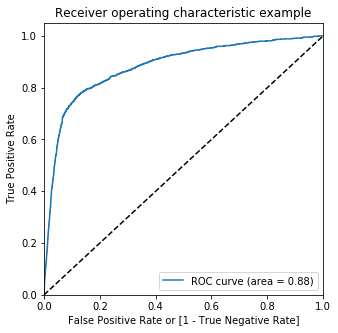

In [148]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

We see from the above ROC curve that the are under the curve is 0.88 which signifies the model that we have built is a good model

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [149]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  Mobile Number  Predicted  0.0  0.1  0.2  0.3  0.4  \
337        0    0.029599   7.000167e+09          0    1    0    0    0    0   
20790      0    0.001588   7.001343e+09          0    1    0    0    0    0   
42083      0    0.034256   7.001863e+09          0    1    0    0    0    0   
95072      0    0.007456   7.002276e+09          0    1    0    0    0    0   
64915      0    0.000356   7.001086e+09          0    1    0    0    0    0   

       0.5  0.6  0.7  0.8  0.9  
337      0    0    0    0    0  
20790    0    0    0    0    0  
42083    0    0    0    0    0  
95072    0    0    0    0    0  
64915    0    0    0    0    0

In [150]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.086638  1.000000  0.000000
0.1   0.1  0.800971  0.816484  0.799500
0.2   0.2  0.896558  0.723077  0.913014
0.3   0.3  0.921264  0.539011  0.957523
0.4   0.4  0.921598  0.339560  0.976807
0.5   0.5  0.918408  0.169231  0.989472
0.6   0.6  0.917218  0.097253  0.994997
0.7   0.7  0.916266  0.050549  0.998384
0.8   0.8  0.914600  0.019780  0.999479
0.9   0.9  0.913600  0.003846  0.999896


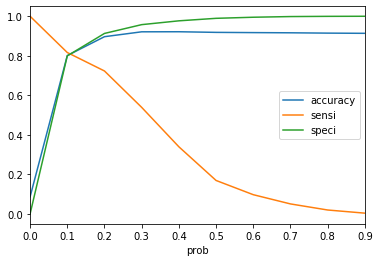

In [151]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above plot, we see that the trade off between Accuracy, Sensitivity and Specificity occurs at probability around 0.1
Hence, we choose 0.1 to be the optimal cutoff point.

In [152]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

Churn  Churn_Prob  Mobile Number  Predicted  0.0  0.1  0.2  0.3  0.4  \
337        0    0.029599   7.000167e+09          0    1    0    0    0    0   
20790      0    0.001588   7.001343e+09          0    1    0    0    0    0   
42083      0    0.034256   7.001863e+09          0    1    0    0    0    0   
95072      0    0.007456   7.002276e+09          0    1    0    0    0    0   
64915      0    0.000356   7.001086e+09          0    1    0    0    0    0   

       0.5  0.6  0.7  0.8  0.9  final_predicted  
337      0    0    0    0    0                0  
20790    0    0    0    0    0                0  
42083    0    0    0    0    0                0  
95072    0    0    0    0    0                0  
64915    0    0    0    0    0                0

In [153]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8009711048698053

After choosing 0.1 as cutoff, we get an accuracy of the model as 80% which is a good value for the model

We derive the confusion matrix to see the other metrics for evaluating the model we have built

In [154]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[15340,  3847],
       [  334,  1486]], dtype=int64)

In [155]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
TP / float(TP+FN)

0.8164835164835165

We see that the model sensitivity is 81.65% which is a good value for this model

## Precision and Recall

In [156]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
confusion

array([[15340,  3847],
       [  334,  1486]], dtype=int64)

### Precision:

In [157]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.27864241515094695

### Recall:

In [158]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8164835164835165

In [159]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.27864241515094695

In [160]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8164835164835165

## Precision and recall tradeoff

In [161]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Churn, y_train_pred_final.final_predicted

(337      0
 20790    0
 42083    0
 95072    0
 64915    0
 98518    0
 50384    0
 41066    0
 50633    0
 3164     1
 42694    0
 67819    0
 90572    0
 44600    0
 80103    0
 36951    0
 22534    0
 71945    0
 88020    0
 79029    0
 74621    0
 70262    0
 58772    0
 96328    0
 31354    0
 7649     0
 42472    0
 88634    0
 51966    0
 29247    0
 29197    0
 8556     0
 52938    0
 31769    0
 84010    0
 58974    0
 80857    1
 59104    0
 11696    0
 91739    0
 96044    0
 10733    0
 73679    0
 14398    0
 43044    0
 7836     0
 60390    0
 51007    0
 67118    0
 41892    0
 45594    0
 48975    0
 6836     0
 73904    0
 97663    0
 32021    0
 59432    0
 1390     0
 21629    0
 82942    0
 49506    0
 7074     0
 68667    1
 85666    0
 9177     0
 94413    0
 83181    0
 86105    0
 86493    0
 39156    0
 45213    0
 83815    0
 62062    0
 15051    0
 35818    0
 95104    0
 79474    0
 89688    0
 89623    0
 75491    0
 14459    0
 70225    0
 29717    0
 338

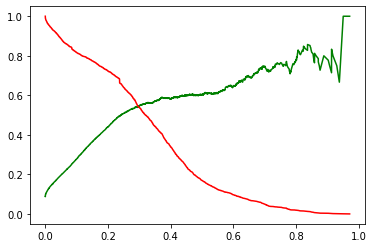

In [162]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

We see that the trade off happens between Precision and sensitivity at aroud 0.25

## Making predictions on the test set

In [163]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

X_test.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
39713  1.346686    -0.100723     -0.469768      -0.265244      -0.282351   
80955 -1.408354    -0.535560     -0.883950      -0.265244       0.517284   
80034  3.935409     4.866067      0.792326       2.663159       6.616307   
93911  0.232148     0.474460      0.026559      -0.265244      -0.282351   
55461  0.281856     1.819205      0.181748      -0.265244      -0.282351   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
39713         -0.408124         -0.377304         -0.423672          1.438347   
80955         -0.541903         -0.791281         -0.423672         -0.332277   
80034         -0.541903         -0.282188         -0.157258         -0.332277   
93911          0.317977          0.648065          1.739497          0.875590   
55461          1.189409         -0.555616         -0.362860         -0.332277   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
39713     -0.476546          0.098226         -0.255698         -0.241318   
80955     -0.810312         -0.465337         -0.506603         -0.241318   
80034     -0.464361          5.092099          0.190079         -0.241318   
93911      0.628869          0.452267         -0.370848         -0.241318   
55461      0.149687          1.622461          0.648931         -0.241318   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8  total_og_mou_8  \
39713     -0.111902     -0.152579      2.112792       -0.313435   
80955     -0.627982     -0.152579     -0.489576       -0.989023   
80034      4.512759     -0.073654     -0.489576        4.214226   
93911      0.043429     -0.152579      0.131836        0.343244   
55461      1.423785     -0.152579     -0.489576        1.307465   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
39713         -0.185952         -0.127173         -0.442664     -0.227301   
80955         -0.620966         -0.830036         -0.448079     -0.857907   
80034         -0.614053         -0.683258         -0.134014     -0.721521   
93911          0.231464          0.254531          0.301887      0.263439   
55461          0.010448         -0.249835          0.604107     -0.121929   

       std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
39713          0.665311         -0.468641         -0.279057     -0.114327   
80955         -0.383829         -0.468641         -0.279057     -0.499778   
80034         -0.183556         -0.096308         -0.279057     -0.183141   
93911         -0.069340         -0.354502         -0.279057     -0.309610   
55461         -0.072821         -0.223624         -0.136278     -0.214061   

       total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
39713       -0.276714     -0.256741     -0.253008    -0.259688   
80955       -0.910052     -0.256741     -0.253008    -0.259688   
80034       -0.588171     -0.256741      0.909588    -0.259688   
93911        0.090190      2.221459     -0.253008     0.637649   
55461       -0.214771     -0.256741     -0.253008    -0.169607   

       total_rech_num_8  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  \
39713          3.907916          1.217738       -0.786817       -0.404526   
80955         -0.810894         -1.337059       -0.389284       -0.404526   
80034          0.455128          3.879225        0.869569        0.818196   
93911         -0.695801          0.549526        2.525955        3.714117   
55461          0.224943          0.266649       -0.919327       -0.404526   

       max_rech_amt_8  last_day_rch_amt_6  last_day_rch_amt_7  \
39713       -0.762223           -0.859457           -0.678388   
80955       -1.108364            0.086244           -0.899076   
80034        0.968482            1.830741            1.749186   
93911        4.083750            4.126131           -0.899076   
55461       -0.208397           -0.648281           -0.307631   

       last_day_rch_am

Choosing only those variables that were finally selected after doing RFE

In [164]:
X_test = X_test[rfe_col]
X_test.head()

std_og_t2t_mou_8  std_og_t2m_mou_8  total_og_mou_8  loc_ic_t2m_mou_8  \
39713          0.098226         -0.255698       -0.313435         -0.127173   
80955         -0.465337         -0.506603       -0.989023         -0.830036   
80034          5.092099          0.190079        4.214226         -0.683258   
93911          0.452267         -0.370848        0.343244          0.254531   
55461          1.622461          0.648931        1.307465         -0.249835   

       spl_ic_mou_8  onnet_mou_good_phase  offnet_mou_good_phase  \
39713     -0.256741             -0.195363              -0.738031   
80955     -0.256741              4.560521              -0.510325   
80034     -0.256741              3.183638               0.909133   
93911      2.221459             -0.085779              -0.288941   
55461     -0.256741              0.937943              -0.580630   

       loc_ic_t2m_mou_good_phase  monthly_2g_8_type_1  monthly_3g_8_type_1  \
39713                  -0.092854                    0                    0   
80955                  -0.782985                    0                    0   
80034                  -0.882821                    0                    0   
93911                  -0.142459                    0                    0   
55461                  -0.366278                    0                    0   

       monthly_3g_8_type_2  
39713                    0  
80955                    0  
80034                    0  
93911                    0  
55461                    0

Adding a constant in the test set as well

In [165]:
X_test_sm = sm.add_constant(X_test)

In [166]:
# Predicting for the test set after adding the constant
y_test_pred = res.predict(X_test_sm)

In [167]:
y_test_pred[:10]

39713    0.040368
80955    0.704406
80034    0.000958
93911    0.001111
55461    0.009151
82494    0.002582
95725    0.000139
87183    0.000736
96332    0.068435
83861    0.095409
dtype: float64

In [168]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [169]:
# Let's see the head
y_pred_1.head()

0
39713  0.040368
80955  0.704406
80034  0.000958
93911  0.001111
55461  0.009151

In [170]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [171]:
# Putting CustID to index
y_test_df['Mobile Number'] = y_test_temp.mobile_number

In [172]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [173]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [174]:
y_pred_final.head()

churn  Mobile Number         0
0      0   7.002243e+09  0.040368
1      1   7.000517e+09  0.704406
2      0   7.002162e+09  0.000958
3      0   7.002152e+09  0.001111
4      0   7.002059e+09  0.009151

In [175]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob', 'churn':'Churn'})
# Rearranging the columns
y_pred_final = y_pred_final[['Mobile Number','Churn','Churn_Prob']]
# Let's see the head of y_pred_final
y_pred_final.head()

Mobile Number  Churn  Churn_Prob
0   7.002243e+09      0    0.040368
1   7.000517e+09      1    0.704406
2   7.002162e+09      0    0.000958
3   7.002152e+09      0    0.001111
4   7.002059e+09      0    0.009151

Using 0.25 as the cutoff as we got from the plot of Precision and Recall trade off

In [176]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.25 else 0)

y_pred_final.head()

Mobile Number  Churn  Churn_Prob  final_predicted
0   7.002243e+09      0    0.040368                0
1   7.000517e+09      1    0.704406                1
2   7.002162e+09      0    0.000958                0
3   7.002152e+09      0    0.001111                0
4   7.002059e+09      0    0.009151                0

In [177]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.9143713904931142

We are getting a 91% accuracy of the model for test set

In [178]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[7753,  478],
       [ 293,  480]], dtype=int64)

In [179]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

TP / float(TP+FN)

0.6209573091849935

Also we are getting a sensitivity of 62.1% which is also not bad.

# Business Insight

The most important features that are significant for predicting the churn are as below:

In [180]:
# list the important features after VIF check
imp_cols = vif['Features'].values.tolist()
print(imp_cols)

['total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_good_phase', 'std_og_t2m_mou_8', 'std_og_t2t_mou_8', 'onnet_mou_good_phase', 'offnet_mou_good_phase', 'spl_ic_mou_8', 'monthly_2g_8_type_1', 'monthly_3g_8_type_1', 'monthly_3g_8_type_2']


In [181]:
len(imp_cols) # number of features for final model 

11

Creating a dataframe for the variables and with their coefficients

In [182]:
 # create dataframe with coefficient along with features
df_logit = pd.DataFrame(X_train_sm.columns.tolist(),res.params.tolist())
df_logit.reset_index(inplace = True) 
# rename the columns name as 'Coef' and 'Feature'
df_logit.columns = ['Coef', 'Feature'] 
df_logit.head()

Coef           Feature
0 -3.818299             const
1  0.574301  std_og_t2t_mou_8
2  0.509618  std_og_t2m_mou_8
3 -2.136174    total_og_mou_8
4 -2.417338  loc_ic_t2m_mou_8

In [183]:
# create dataframe by removing 0 coefficient features
df_res = df_logit.loc[(df_logit['Coef']!=0.000)] 
# sort the 'Coef' values
df_res.sort_values('Coef', ascending = False, inplace = True) 
df_res.head()

Coef                    Feature
1  0.574301           std_og_t2t_mou_8
2  0.509618           std_og_t2m_mou_8
8  0.472811  loc_ic_t2m_mou_good_phase
7  0.428737      offnet_mou_good_phase
6  0.331135       onnet_mou_good_phase

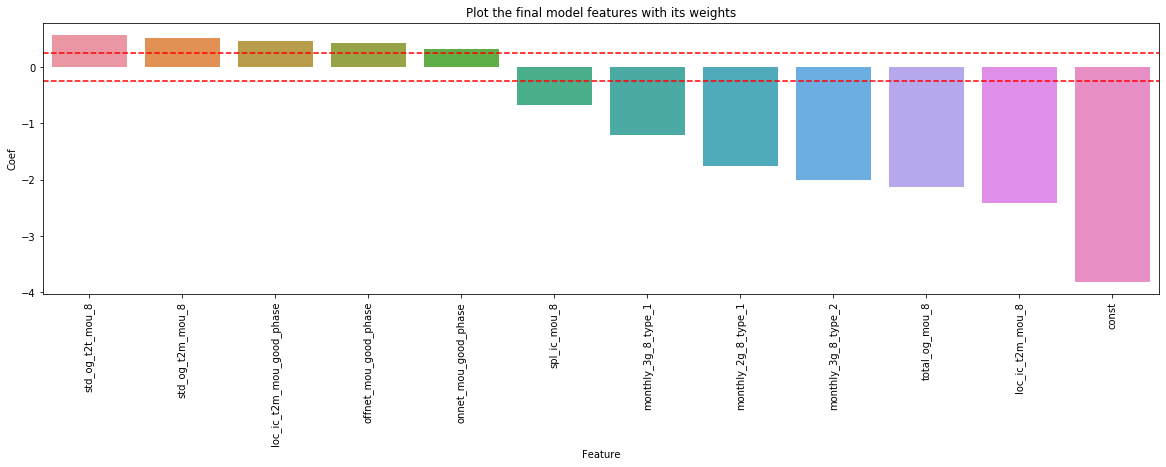

In [184]:
# plot the final model features with its weights
plt.figure(figsize = (20,5))
sns.barplot(x = 'Feature', y = 'Coef', data = df_res)

# horizontal on the bar plot showing top features  
plt.axhline(y=0.25, color='r', linestyle='--',linewidth= 1.5) 
plt.axhline(y=-0.25, color='r', linestyle='--',linewidth= 1.5) 


plt.title('Plot the final model features with its weights')
plt.xticks(rotation = 90)
plt.show()

So, the most significant variables that decide the churn the most are as below:

- total_og_mou_8
- loc_ic_t2m_mou_8
- loc_ic_t2m_mou_good_phase
- std_og_t2m_mou_8
- std_og_t2t_mou_8
- onnet_mou_good_phase
- offnet_mou_good_phase
- spl_ic_mou_8
- monthly_2g_8_type_1
- monthly_3g_8_type_1
- monthly_3g_8_type_2



# Recommendation to the business to reduce the churn percentage:

## From the above most important predictor variables, we can see that the probability of churn gets reduced as the total outgoing minutes od use increases. Also, we see that as the internet usage (both 2G and 3G) increases, the churn probability decreases. Also the special incoming minutes of usage is effecting the churn rate inversely i.e. as the special incoming minute of usage increases during the action phase, the churn rate decreases. This can be a good indicator of churn during the action phase. 

## The Telecom company hence introduce some plans which provide the customers with good and comperatively cheaper internet plans. This way, customers will be happy to use internet at a comperatively lesser price than other operators in the market. Also, if the company provides good local call plans, the customers seem to be more loyal to the operator and hence will not switch to other operators. 

# ===============================================================
# Now, we derive other models to predict the churn
# ===============================================================

# PCA

In [185]:
# checking data imbalance before proceeding with modeling
# split the data in to train and test data sets

df_train, df_test = train_test_split(HVC, test_size = 0.3, random_state = 42)

print(df_train.shape)
print(df_test.shape)

columns_list = df_train.columns.tolist()
df_train = df_train.astype('float64') 
df_test = df_test.astype('float64')

# considering columns which are having max values more than 1 for scaling
scaling_columns = df_train.columns[(df_train.max()>1.0)].tolist()
print(scaling_columns)

scaler = StandardScaler()
#StandardScaler
df_train[scaling_columns] = scaler.fit_transform(df_train[scaling_columns]) # fit_transform on X_trian
df_test[scaling_columns] = scaler.transform(df_test[scaling_columns]) # transform on X_test

# split df_train to X_train and y_trian
X_train = df_train.drop(columns = 'churn')
y_train = df_train['churn']

print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)

# split df_test to X_test and y_test
X_test = df_test.drop(columns = 'churn')
y_test = df_test['churn']

print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

(21007, 100)
(9004, 100)
['mobile_number', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'arpu_good_phase', 'onnet_mou_good_phase', 'offnet_mou_good_phase', 'roam_ic_mou_good_phase', 'roam_og_mou_good_phase', 'loc_og_t2

In [186]:
# create smote object
smote = SMOTE(random_state = 42) 

In [187]:
# fit smote on X_train and y_train to get new set of data frames
X_train_res, y_train_res = smote.fit_sample(X_train,y_train) 

In [188]:
pca = PCA(random_state = 42) # creat object

In [189]:
pca.fit(X_train) # apply pca on 'X_train'

PCA(random_state=42)

In [190]:
#List of PCA components
pca.components_

array([[ 3.40189990e-02,  1.80804361e-01,  4.33038240e-02, ...,
         1.25287400e-02,  4.97322266e-03,  3.70731141e-03],
       [-2.61149645e-02,  1.63365648e-01,  2.17099266e-01, ...,
        -1.33111038e-02, -4.31271609e-03, -1.05136942e-03],
       [-1.11573164e-02,  1.17777912e-01, -4.19168994e-02, ...,
         3.15742916e-02,  1.55347236e-02,  1.05739534e-02],
       ...,
       [-2.48488494e-05, -4.41035799e-03,  3.63355860e-01, ...,
         2.21300625e-02,  4.29066165e-02,  9.80211927e-02],
       [ 3.03575350e-04,  9.60234818e-03, -9.21876462e-02, ...,
        -1.45395850e-02, -2.43369114e-02, -5.05862073e-02],
       [ 4.13402995e-04,  6.61442723e-03, -1.65017489e-01, ...,
        -2.48869907e-04, -3.91734173e-03, -3.12128391e-03]])

In [191]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([1.29436249e-01, 1.02765389e-01, 6.46416909e-02, 5.25522093e-02,
       5.04482800e-02, 4.06207942e-02, 3.35077646e-02, 3.06671761e-02,
       2.87409184e-02, 2.67744315e-02, 2.52308098e-02, 2.39863559e-02,
       2.20494484e-02, 2.11956865e-02, 2.02496473e-02, 1.88689163e-02,
       1.84502157e-02, 1.49766924e-02, 1.37654815e-02, 1.31349339e-02,
       1.23037434e-02, 1.19408599e-02, 1.16261230e-02, 1.09722956e-02,
       1.03999297e-02, 1.00059158e-02, 9.52719181e-03, 9.18056921e-03,
       8.76331149e-03, 7.76983283e-03, 7.53156125e-03, 7.36751408e-03,
       7.15842830e-03, 6.60716972e-03, 6.28814318e-03, 6.19083615e-03,
       6.06516366e-03, 5.97690782e-03, 5.23558043e-03, 5.14285527e-03,
       5.01006202e-03, 4.86074312e-03, 4.49401467e-03, 4.25227009e-03,
       3.98549447e-03, 3.83681919e-03, 3.75397172e-03, 3.28609720e-03,
       3.16249466e-03, 3.08048796e-03, 3.04306171e-03, 2.97349217e-03,
       2.83001028e-03, 2.76734454e-03, 2.71123820e-03, 2.53515331e-03,
      

In [192]:
# Cummulative Variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.12943625, 0.23220164, 0.29684333, 0.34939554, 0.39984382,
       0.44046461, 0.47397238, 0.50463955, 0.53338047, 0.5601549 ,
       0.58538571, 0.60937207, 0.63142152, 0.6526172 , 0.67286685,
       0.69173577, 0.71018598, 0.72516268, 0.73892816, 0.75206309,
       0.76436683, 0.77630769, 0.78793382, 0.79890611, 0.80930604,
       0.81931196, 0.82883915, 0.83801972, 0.84678303, 0.85455286,
       0.86208443, 0.86945194, 0.87661037, 0.88321754, 0.88950568,
       0.89569652, 0.90176168, 0.90773859, 0.91297417, 0.91811702,
       0.92312709, 0.92798783, 0.93248184, 0.93673411, 0.94071961,
       0.94455643, 0.9483104 , 0.9515965 , 0.95475899, 0.95783948,
       0.96088254, 0.96385603, 0.96668604, 0.96945339, 0.97216463,
       0.97469978, 0.97719309, 0.97952204, 0.98152594, 0.98336552,
       0.98499701, 0.9866223 , 0.98803599, 0.9893336 , 0.99048701,
       0.99153241, 0.99249309, 0.99315916, 0.99378113, 0.99435145,
       0.99487503, 0.99539289, 0.99587219, 0.99631388, 0.99667

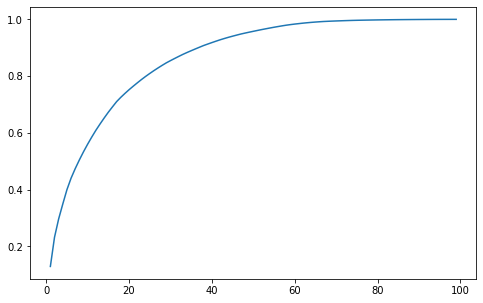

In [193]:
fig = plt.figure(figsize=(8,5))
plt.plot(range(1,len(var_cumu)+1),var_cumu)
plt.show()

In [194]:
pca_n = IncrementalPCA(n_components=38)

In [195]:
# apply pca with n components on X_train
X_train_pca = pca_n.fit_transform(X_train)

In [196]:
X_train_pca.shape

(21007, 38)

In [197]:
pd.DataFrame(X_train_pca).head()

0         1         2         3         4         5         6  \
0 -0.936383 -3.064001  0.760389 -0.407656 -0.684705 -0.210885 -0.630912   
1 -1.594096  0.001024 -0.975293  0.765015 -0.218451 -0.789546 -0.893541   
2 -2.298019 -3.024983  1.791148 -0.887792 -1.412308  0.376003 -0.500278   
3 -1.612890  0.494052 -0.028288 -0.165354 -0.842114  2.211882 -1.130002   
4  3.991681 -3.604367 -0.658283 -0.198894 -0.044806  0.806659 -0.435610   

          7         8         9        10        11        12        13  \
0  0.219517 -0.840558 -0.202822  0.030288 -0.500102  0.839499  0.368459   
1  0.431759  1.904677 -0.605090 -0.786899  0.811333 -0.570506  0.760340   
2 -0.646967  0.070132 -0.911105 -0.454460  0.698447  0.362629  0.319141   
3  0.015050 -0.441494 -0.551120 -1.853744 -0.695553 -0.719921 -0.006229   
4 -0.843276 -0.681491  0.126990 -1.789066 -0.752562  1.360448  2.518388   

         14        15        16        17        18        19        20  \
0 -1.028970  0.222614 -0.082895  2.030530 -1.064276  0.910701  0.442830   
1  0.056797 -0.188558 -0.384433 -0.129699 -0.463500 -0.170881  0.744930   
2  0.561276 -0.406427 -0.625562 -0.715435  1.816417  0.556352 -0.691456   
3 -0.119538 -0.001005  0.757241  0.077814  1.158935 -0.905132 -0.653562   
4 -1.138550 -0.328246 -0.679256  2.361481  0.527531 -1.466930 -0.165464   

         21        22        23        24        25        26        27  \
0 -0.586351  0.129708 -0.072184 -0.285844  0.021339  0.479311 -0.106484   
1 -0.642671 -0.271945  0.404302 -0.425486  0.827369 -0.131406  0.121195   
2  0.249362 -0.104738  0.455008 -0.506965 -1.477193  0.027417 -0.599074   
3 -0.033772 -0.251628  0.235430 -0.124584  0.661153 -0.584722 -0.935794   
4  0.965544 -0.023536  0.663627 -0.763369 -0.972132 -0.242061  0.071663   

         28        29        30        31        32        33        34  \
0  0.611162  0.271778 -0.530484 -0.705939  0.624313 -0.295701  1.668059   
1 -0.020856 -1.057508 -0.540150  0.332194 -0.415421 -0.227623 -0.306290   
2  0.485651  0.299002  0.098768 -0.354347 -0.442248  0.266587  0.997678   
3 -0.609078 -1.042721  0.604720  0.271789  0.163217 -0.561912  0.389975   
4 -1.283468  0.889378  0.807456 -0.103623 -0.824018  0.217367 -0.752826   

         35        36        37  
0 -0.149170  0.890920  1.310242  
1 -0.278496  0.285218  0.180222  
2 -0.177761  0.695205  0.296166  
3 -0.483329  0.309742 -0.051851  
4  1.072499 -0.683437 -0.369342

In [198]:
# create correlation matrix
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat.shape

(38, 38)

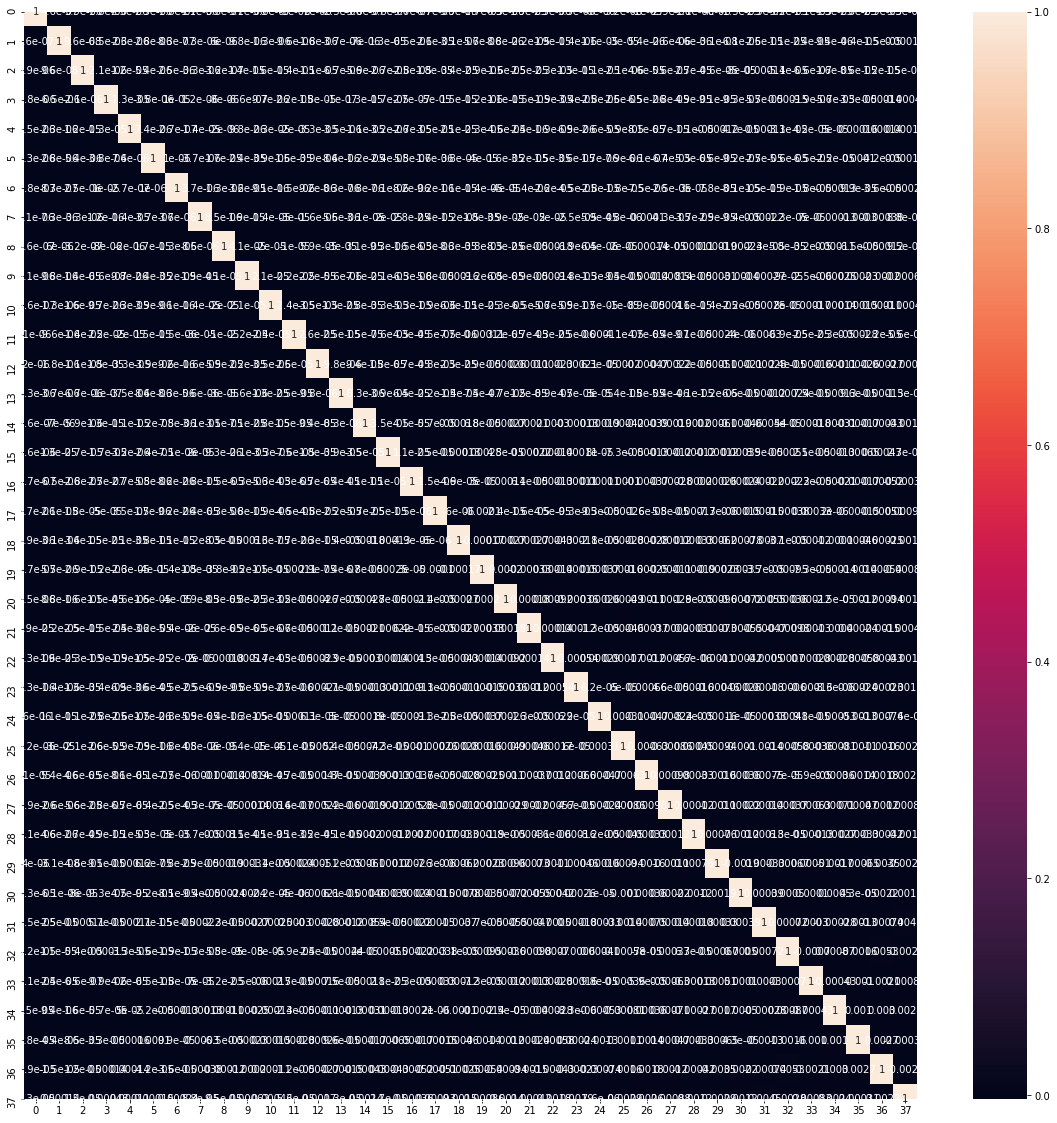

In [199]:
# plot heat map to see the correlation between PCs
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot=True);plt.show()

there is no multicollinearity

In [200]:
# apply pca with n components on X_test
X_test_pca = pca_n.transform(X_test)
X_test_pca.shape

(9004, 38)

# 1. Applying Logistic Regression on top of PCA

In [201]:
# applying logistic regression on the pca data sets
LR_pca = LogisticRegression(random_state = 42, n_jobs= -1)

In [202]:
# fit the model on pca train data set
model_pca = LR_pca.fit(X_train_pca,y_train) 

In [203]:
y_train_pred = model_pca.predict_proba(X_train_pca)[:,1]
y_train_pred

array([0.04573501, 0.05149575, 0.02549271, ..., 0.14858487, 0.01193036,
       0.00884   ])

In [204]:
# create a data frame with target variable and probabilities
y_train_pred_prob = pd.DataFrame({'churn_user':y_train.values, 'churn_user_Prob':y_train_pred})
y_train_pred_prob.head()

churn_user  churn_user_Prob
0         0.0         0.045735
1         0.0         0.051496
2         0.0         0.025493
3         0.0         0.040573
4         0.0         0.000659

In [205]:
# create new columns 'churn_user_pred' by using 'churn_user_Prob' values. 1 if churn_user_Prob > 0.5 else 0
y_train_pred_prob['churn_user_pred'] = y_train_pred_prob.churn_user_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_prob.head()

churn_user  churn_user_Prob  churn_user_pred
0         0.0         0.045735                0
1         0.0         0.051496                0
2         0.0         0.025493                0
3         0.0         0.040573                0
4         0.0         0.000659                0

In [206]:
# Check the distribution of probability, should be with in 0-1
y_train_pred_prob['churn_user_Prob'].describe()

count    2.100700e+04
mean     8.663802e-02
std      1.492123e-01
min      3.541835e-08
25%      5.376898e-03
50%      2.463641e-02
75%      8.622959e-02
max      9.727360e-01
Name: churn_user_Prob, dtype: float64

In [207]:
def confusion_matrix(confusion, actual_target, predicted_target):
    
    print(confusion,'\n')
 
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    print('Sensitivity (or) Recall score :', (TP / float(TP+FN)).round(2))
    print('Specificity:', (TN / float(TN+FP)).round(2))
    print('roc_auc_score:',roc_auc_score(actual_target, predicted_target).round(2))
    print('accuracy_score:',accuracy_score(actual_target, predicted_target).round(2))

In [208]:
print(classification_report(y_train_pred_prob.churn_user,y_train_pred_prob.churn_user_pred)) # check the classification report

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     19187
         1.0       0.65      0.27      0.38      1820

    accuracy                           0.92     21007
   macro avg       0.79      0.63      0.67     21007
weighted avg       0.91      0.92      0.91     21007



In [209]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_prob.churn_user, y_train_pred_prob.churn_user_pred )

#confusion_matrix(confusion, actual_target, predicted_target):
confusion_matrix(confusion,y_train_pred_prob.churn_user,y_train_pred_prob.churn_user_pred)

[[18921   266]
 [ 1324   496]] 

Sensitivity (or) Recall score : 0.27
Specificity: 0.99
roc_auc_score: 0.63
accuracy_score: 0.92


Using PCA, we get accuracy score 92% and most important concern to have good recall, in this case of PCA model we got 27%.

#Find optimal probability cutoff

In [210]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_prob[i]= y_train_pred_prob.churn_user_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_prob.head()

churn_user  churn_user_Prob  churn_user_pred  0.0  0.1  0.2  0.3  0.4  0.5  \
0         0.0         0.045735                0    1    0    0    0    0    0   
1         0.0         0.051496                0    1    0    0    0    0    0   
2         0.0         0.025493                0    1    0    0    0    0    0   
3         0.0         0.040573                0    1    0    0    0    0    0   
4         0.0         0.000659                0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [211]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_prob.churn_user, y_train_pred_prob[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.086638  1.000000  0.000000
0.1   0.1  0.828914  0.803846  0.831292
0.2   0.2  0.902175  0.689011  0.922395
0.3   0.3  0.922502  0.592308  0.953823
0.4   0.4  0.926120  0.441209  0.972117
0.5   0.5  0.924311  0.272527  0.986136
0.6   0.6  0.920693  0.157692  0.993068
0.7   0.7  0.917742  0.082418  0.996977
0.8   0.8  0.915695  0.037363  0.999010
0.9   0.9  0.914219  0.011538  0.999844


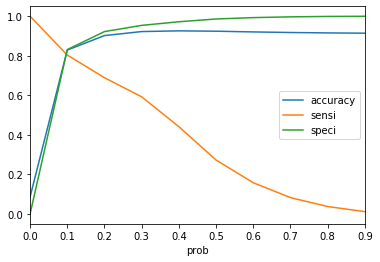

In [212]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
#plt.vlines(x=0.54, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

Optimal probability cutoff : 0.1

In [213]:
# test set evaluation
y_test_pred = model_pca.predict_proba(X_test_pca)[:,1]
y_test_pred

array([0.0024153 , 0.78961748, 0.01356569, ..., 0.36786755, 0.13351672,
       0.03869211])

In [214]:
# create a data frame with target variable and probabilities
y_test_pred_prob = pd.DataFrame({'churn_user':y_test.values, 'churn_user_Prob':y_test_pred})
y_test_pred_prob.head()

churn_user  churn_user_Prob
0         0.0         0.002415
1         1.0         0.789617
2         0.0         0.013566
3         0.0         0.012401
4         0.0         0.019094

In [215]:
# create new columns 'churn_user_pred' by using 'churn_user_Prob' values. 1 if churn_user_Prob > 0.54 else 0
y_test_pred_prob['churn_user_pred'] = y_test_pred_prob.churn_user_Prob.map(lambda x: 1 if x > 0.1 else 0)
y_test_pred_prob.head()

churn_user  churn_user_Prob  churn_user_pred
0         0.0         0.002415                0
1         1.0         0.789617                1
2         0.0         0.013566                0
3         0.0         0.012401                0
4         0.0         0.019094                0

In [216]:
# Check the distribution of probability, should be with in 0-1
y_test_pred_prob['churn_user_Prob'].describe()

count    9.004000e+03
mean     8.540380e-02
std      1.483938e-01
min      7.324445e-08
25%      5.461685e-03
50%      2.329162e-02
75%      8.334045e-02
max      9.912540e-01
Name: churn_user_Prob, dtype: float64

In [217]:
print(classification_report(y_test_pred_prob.churn_user, y_test_pred_prob.churn_user_pred)) # check the classification report

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.90      8231
         1.0       0.32      0.80      0.45       773

    accuracy                           0.83      9004
   macro avg       0.65      0.82      0.68      9004
weighted avg       0.92      0.83      0.86      9004



In [218]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_prob.churn_user, y_test_pred_prob.churn_user_pred )

#confusion_matrix(confusion, actual_target, predicted_target):
confusion_matrix(confusion,y_test_pred_prob.churn_user, y_test_pred_prob.churn_user_pred)

[[6891 1340]
 [ 155  618]] 

Sensitivity (or) Recall score : 0.8
Specificity: 0.84
roc_auc_score: 0.82
accuracy_score: 0.83


So, after finding the principle components using PCA, we apply Logistic Regression algorithm and build a model. We predict on the test set using this model and getting Accuracy of 83% and Sensitivity of 80%

# 2. Applying Random Forest algorith on top of PCA

In [219]:
# create object
rfc = RandomForestClassifier(random_state = 42,n_jobs=-1) 

In [220]:
# fit the model
rfc.fit(X_train_res,y_train_res) 

RandomForestClassifier(n_jobs=-1, random_state=42)

In [221]:
# predictions on X_test_pca
y_test_pred = rfc.predict(X_test) 

# check the classification report
print(classification_report(y_test,y_test_pred)) 

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      8231
         1.0       0.57      0.68      0.62       773

    accuracy                           0.93      9004
   macro avg       0.77      0.81      0.79      9004
weighted avg       0.93      0.93      0.93      9004



In [222]:
y_test.shape

(9004,)

In [223]:
y_test_pred.shape

(9004,)

In [224]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[7840  391]
 [ 251  522]]


In [225]:
#confusion_matrix(confusion, actual_target, predicted_target):
confusion_matrix(confusion,y_test, y_test_pred)

[[7840  391]
 [ 251  522]] 

Sensitivity (or) Recall score : 0.68
Specificity: 0.95
roc_auc_score: 0.81
accuracy_score: 0.93


## Accuracy of model on test set is very good 93%, but recall score is not up to mark which is only 68%. 
## There is a chance to improve by tuning hyperparameters

In [226]:
# Tuning : max_depth

n_folds = 5 # number of folds for k-fold CV

# parameters for model building
parameters = {'max_depth': range(2,15,2)}

# instantiate the model
rf = RandomForestClassifier(random_state = 42, n_jobs = -1) # use 'n_jobs = -1' to use optimum number of cores


# fit tree on training data
rf_depth = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                    return_train_score=True,
                   scoring= 'accuracy',n_jobs = -1)
rf_depth.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1, param_grid={'max_depth': range(2, 15, 2)},
             return_train_score=True, scoring='accuracy')

In [227]:
# scores of GridSearch CV
scores = rf_depth.cv_results_
pd.DataFrame(scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.435614      0.878632         0.608374        0.289946   
1       7.158257      0.708947         1.001523        0.543469   
2      10.680639      0.320430         1.190019        0.377463   
3      14.138392      0.946186         1.662755        0.400031   
4      21.281093      0.411296         2.024786        0.469337   
5      23.891314      0.700708         1.957766        0.371668   
6      22.474703      2.599374         1.043211        0.533771   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.811596           0.823192   
1               4   {'max_depth': 4}           0.851726           0.866840   
2               6   {'max_depth': 6}           0.873225           0.897980   
3               8   {'max_depth': 8}           0.889381           0.917524   
4              10  {'max_depth': 10}           0.906450           0.933941   
5              12  {'max_depth': 12}           0.920912           0.944886   
6              14  {'max_depth': 14}           0.929121           0.953094   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.832834           0.821629           0.819260         0.821702   
1           0.877785           0.871922           0.872426         0.868140   
2           0.901368           0.893420           0.891843         0.891567   
3           0.915179           0.913876           0.917123         0.910617   
4           0.932769           0.930163           0.934584         0.927581   
5           0.944104           0.943583           0.947876         0.940272   
6           0.951661           0.951922           0.957649         0.948689   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.006845                7            0.828463            0.822437   
1        0.008908                6            0.876771            0.867650   
2        0.009769                5            0.905632            0.897619   
3        0.010700                4            0.931268            0.924004   
4        0.010674                3            0.955634            0.949607   
5        0.009794                2            0.974266            0.970618   
6        0.010019                1            0.983583            0.982280   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.821134            0.823480            0.822834   
1            0.870093            0.869637            0.869121   
2            0.899541            0.895827            0.893062   
3            0.924786            0.922864            0.921140   
4            0.950813            0.950259            0.948567   
5            0.970585            0.970748            0.969870   
6            0.982833            0.982345            0.982508   

   mean_train_score  std_train_score  
0          0.823670         0.002516  
1          0.870655         0.003167  
2          0.898336         0.004226  
3          0.924812         0.003453  
4          0.950976         0.002446  
5          0.971217         0.001555  
6          0.982710         0.000477

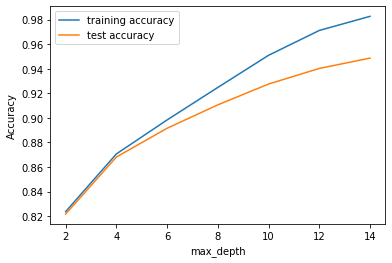

In [228]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

max_depth: 4-6 looks good to consider.

In [229]:
# tuning : n_estimators

n_folds = 5 # number of folds for k-fold CV

# parameters for model building
parameters = {'n_estimators': range(5,100, 5)}

# instantiate the model
rf = RandomForestClassifier(random_state = 42, n_jobs = -1)


# fit tree on training data
rf_n_est = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                    return_train_score=True,
                   scoring= 'accuracy', n_jobs = -1)
rf_n_est.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1, param_grid={'n_estimators': range(5, 100, 5)},
             return_train_score=True, scoring='accuracy')

In [230]:
# scores of GridSearch CV
scores = rf_n_est.cv_results_
pd.DataFrame(scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.921262      0.281702         0.403324        0.306276   
1        3.043663      0.304435         0.799461        0.159482   
2        3.988333      0.261089         1.083503        0.178368   
3        5.690183      0.310542         1.340217        0.081033   
4        6.517371      0.422113         1.097666        0.067104   
5        7.507123      0.118551         1.135963        0.061542   
6        8.982780      0.223330         1.332039        0.065905   
7       10.314618      0.118467         1.273595        0.129977   
8       12.357156      0.392168         1.523527        0.219986   
9       13.371445      0.161884         1.474458        0.297563   
10      15.220699      0.608872         1.672328        0.302613   
11      16.501674      0.156141         1.576385        0.339298   
12      18.303855      0.433816         1.681106        0.357121   
13      19.346667      0.119749         1.543274        0.337733   
14      21.133489      0.456209         1.756504        0.372410   
15      22.406685      0.290434         1.528513        0.328148   
16      24.335526      0.514522         1.790413        0.337164   
17      25.756725      0.371331         1.574391        0.238775   
18      24.505474      3.828311         1.010299        0.653340   

   param_n_estimators                params  split0_test_score  \
0                   5   {'n_estimators': 5}           0.916352   
1                  10  {'n_estimators': 10}           0.924951   
2                  15  {'n_estimators': 15}           0.932899   
3                  20  {'n_estimators': 20}           0.933160   
4                  25  {'n_estimators': 25}           0.935114   
5                  30  {'n_estimators': 30}           0.936026   
6                  35  {'n_estimators': 35}           0.936547   
7                  40  {'n_estimators': 40}           0.936808   
8                  45  {'n_estimators': 45}           0.937329   
9                  50  {'n_estimators': 50}           0.936417   
10                 55  {'n_estimators': 55}           0.935635   
11                 60  {'n_estimators': 60}           0.936678   
12                 65  {'n_estimators': 65}           0.936938   
13                 70  {'n_estimators': 70}           0.936547   
14                 75  {'n_estimators': 75}           0.936938   
15                 80  {'n_estimators': 80}           0.936156   
16                 85  {'n_estimators': 85}           0.937329   
17                 90  {'n_estimators': 90}           0.937329   
18                 95  {'n_estimators': 95}           0.937720   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.946971           0.939414           0.942280   
1            0.957134           0.954919           0.954137   
2            0.959609           0.957003           0.957134   
3            0.961042           0.957915           0.957264   
4            0.961042           0.958046           0.959609   
5            0.962736           0.958697           0.960261   
6            0.962866           0.957915           0.959479   
7            0.963909           0.959088           0.960912   
8            0.963388           0.958958           0.961824   
9            0.963909           0.959870           0.961303   
10           0.964560           0.959609           0.961824   
11           0.963779           0.960782           0.961954   
12           0.963518           0.960130           0.961694   
13           0.964039           0.960521           0.962736   
14           0.963648           0.960912           0.962345   
15           0.963518           0.960782           0.963518   
16           0.964430           0.960261           0.963127   
17           0.963648           0.960000           0.963518   
18           0.963648           0.960261           0.963257   

    split4_test_score  mean_test_score  std_test_score  rank_

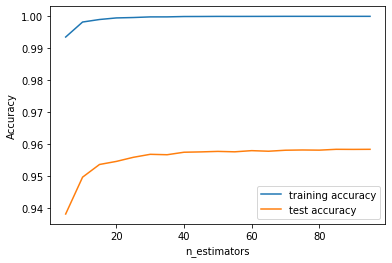

In [231]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

n_estimator: 80 looks good to consider.

In [232]:
# Tuning : max_features

n_folds = 5 # number of folds for k-fold CV

# parameters for model building
parameters = {'max_features': range(5,40,5)}

# instantiate the model
rf = RandomForestClassifier(random_state = 42, n_jobs=-1)


# fit tree on training data
rf_max_fea = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                    return_train_score=True,
                   scoring= 'accuracy',n_jobs=-1)
rf_max_fea.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1, param_grid={'max_features': range(5, 40, 5)},
             return_train_score=True, scoring='accuracy')

In [233]:
# scores of GridSearch CV
scores = rf_max_fea.cv_results_
pd.DataFrame(scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      18.271541      0.602447         0.947268        0.797589   
1      35.191299      0.794119         1.320669        0.562662   
2      51.645699      0.387660         1.828313        0.324236   
3      71.534918      0.337753         2.025984        0.108075   
4      90.895352      1.225441         2.091808        0.140328   
5     111.394341      0.885406         2.047327        0.121938   
6     114.705296     19.780971         1.147332        0.766274   

  param_max_features                params  split0_test_score  \
0                  5   {'max_features': 5}           0.938893   
1                 10  {'max_features': 10}           0.940065   
2                 15  {'max_features': 15}           0.936287   
3                 20  {'max_features': 20}           0.933941   
4                 25  {'max_features': 25}           0.933029   
5                 30  {'max_features': 30}           0.932769   
6                 35  {'max_features': 35}           0.933420   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.964039           0.961824           0.963909           0.967422   
1           0.963257           0.960130           0.963127           0.967944   
2           0.963127           0.960521           0.961824           0.967422   
3           0.964039           0.959609           0.961303           0.965468   
4           0.964691           0.960651           0.962866           0.966250   
5           0.964169           0.959739           0.962736           0.966901   
6           0.964169           0.959739           0.963127           0.964425   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.959217        0.010320                1                 1.0   
1         0.958905        0.009746                2                 1.0   
2         0.957836        0.011022                3                 1.0   
3         0.956872        0.011646                7                 1.0   
4         0.957497        0.012376                4                 1.0   
5         0.957263        0.012463                5                 1.0   
6         0.956976        0.011896                6                 1.0   

   split1_train_score  split2_train_score  split3_train_score  \
0                 1.0                 1.0                 1.0   
1                 1.0                 1.0                 1.0   
2                 1.0                 1.0                 1.0   
3                 1.0                 1.0                 1.0   
4                 1.0                 1.0                 1.0   
5                 1.0                 1.0                 1.0   
6                 1.0                 1.0                 1.0   

   split4_train_score  mean_train_score  std_train_score  
0                 1.0               1.0              0.0  
1                 1.0               1.0              0.0  
2                 1.0               1.0              0.0  
3                 1.0               1.0              0.0  
4                 1.0               1.0              0.0  
5                 1.0               1.0              0.0  
6                 1.0               1.0              0.0

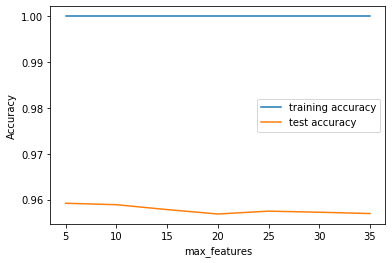

In [234]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

max_features: 5-15

In [235]:
# tuning : min_sample_leaf

n_folds = 5 # number of folds for k-fold CV

# parameters for model building
parameters = {'min_samples_leaf': range(10, 500, 100)}

# instantiate the model
rf = RandomForestClassifier(random_state = 42, n_jobs= -1)


# fit tree on training data
rf_min_sam_leaf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                    return_train_score=True,
                   scoring= 'accuracy', n_jobs= -1)
rf_min_sam_leaf.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1, param_grid={'min_samples_leaf': range(10, 500, 100)},
             return_train_score=True, scoring='accuracy')

In [236]:
# scores of GridSearch CV
scores = rf_min_sam_leaf.cv_results_
pd.DataFrame(scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      27.545345      0.509896         1.090684        0.558133   
1      19.637889      2.741124         0.876457        0.383294   
2      13.380620      0.592987         1.362756        0.433574   
3      11.648251      0.227138         1.360364        0.517623   
4       9.326462      2.028154         0.639290        0.379941   

  param_min_samples_leaf                     params  split0_test_score  \
0                     10   {'min_samples_leaf': 10}           0.908274   
1                    110  {'min_samples_leaf': 110}           0.869186   
2                    210  {'min_samples_leaf': 210}           0.863844   
3                    310  {'min_samples_leaf': 310}           0.859674   
4                    410  {'min_samples_leaf': 410}           0.858502   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.940195           0.938502           0.935765           0.942012   
1           0.899544           0.899544           0.895244           0.898879   
2           0.889511           0.890945           0.889381           0.887542   
3           0.884560           0.888860           0.885993           0.882330   
4           0.881433           0.881824           0.880130           0.878030   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.932950        0.012508                1            0.964592   
1         0.892479        0.011756                2            0.904622   
2         0.884245        0.010258                3            0.893808   
3         0.880284        0.010520                4            0.887684   
4         0.875984        0.008841                5            0.885013   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.959543            0.960552            0.958956   
1            0.897326            0.898042            0.896707   
2            0.885827            0.886609            0.887032   
3            0.881723            0.882081            0.883449   
4            0.876706            0.874752            0.877781   

   split4_train_score  mean_train_score  std_train_score  
0            0.958990          0.960527         0.002113  
1            0.895277          0.898395         0.003244  
2            0.885147          0.887684         0.003129  
3            0.879218          0.882831         0.002785  
4            0.876156          0.878082         0.003600

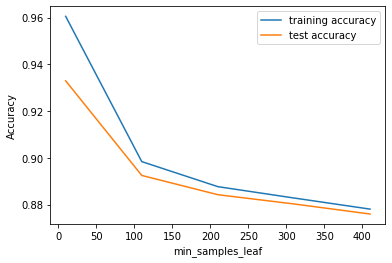

In [237]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_samples_leaf : 100-200

In [238]:
# tuning: minsample_split

n_folds = 5 # number of folds for k-fold CV

# parameters for model building
parameters = {'min_samples_split': range(100, 800, 200)}

# instantiate the model
rf = RandomForestClassifier(random_state = 42, n_jobs=-1)


# fit tree on training data
rf_min_sam_split = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                    return_train_score=True,
                   scoring= 'accuracy', n_jobs=-1)
rf_min_sam_split.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1, param_grid={'min_samples_split': range(100, 800, 200)},
             return_train_score=True, scoring='accuracy')

In [239]:
# scores of GridSearch CV
scores = rf_min_sam_split.cv_results_
pd.DataFrame(scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      29.957097      1.243255         0.584836        0.176472   
1      25.367369      0.879926         0.748000        0.501357   
2      23.092253      0.351041         0.593613        0.229786   
3      20.996056      0.950524         0.630715        0.248946   

  param_min_samples_split                      params  split0_test_score  \
0                     100  {'min_samples_split': 100}           0.893029   
1                     300  {'min_samples_split': 300}           0.878176   
2                     500  {'min_samples_split': 500}           0.871401   
3                     700  {'min_samples_split': 700}           0.868274   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.925603           0.923257           0.922085           0.925593   
1           0.908404           0.907362           0.904625           0.908392   
2           0.900195           0.899414           0.898241           0.899401   
3           0.895375           0.893420           0.892378           0.894318   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.917913        0.012516                1            0.946415   
1         0.901392        0.011690                2            0.919378   
2         0.893730        0.011182                3            0.906870   
3         0.888753        0.010287                4            0.902928   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.936447            0.937848            0.936350   
1            0.908792            0.909769            0.908564   
2            0.898531            0.898075            0.897651   
3            0.892016            0.891365            0.891267   

   split4_train_score  mean_train_score  std_train_score  
0            0.935244          0.938461         0.004062  
1            0.908436          0.910988         0.004221  
2            0.896710          0.899567         0.003700  
3            0.892834          0.894082         0.004459

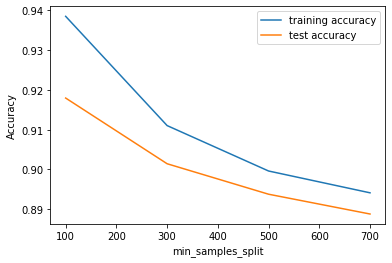

In [240]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

minsample_split:200-600

In [241]:
n_folds = 5 # number of folds for k-fold CV

# parameters for model building
param_grid = {
    'max_depth': [4,6],
    'min_samples_leaf': [100,200],
    'min_samples_split': [200,600],
    'n_estimators': [80], 
    'max_features': [5,15]
}
# instantiate the model
rf = RandomForestClassifier(random_state = 42,n_jobs=-1)


# fit tree on training data
rf_grid = GridSearchCV(rf, param_grid = param_grid, 
                    cv=n_folds,
                    return_train_score=True,
                   scoring= 'accuracy',verbose = 1,n_jobs=-1)
rf_grid.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  3.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6], 'max_features': [5, 15],
                         'min_samples_leaf': [100, 200],
                         'min_samples_split': [200, 600],
                         'n_estimators': [80]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [242]:
# best accuracy score
rf_grid.best_score_ 

0.890264408183986

In [243]:
# parameters for best accuracy
rf_grid.best_params_ 

{'max_depth': 6,
 'max_features': 15,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 80}

In [244]:
rfc_final = RandomForestClassifier(max_depth=6,
                                   max_features=5,
                                   min_samples_leaf=100,
                                   min_samples_split=600,
                                   n_estimators=80,
                                   random_state=42,n_jobs=-1)

In [245]:
rfc_final.fit(X_train_res,y_train_res)

RandomForestClassifier(max_depth=6, max_features=5, min_samples_leaf=100,
                       min_samples_split=600, n_estimators=80, n_jobs=-1,
                       random_state=42)

In [246]:
y_test_pred = rfc_final.predict(X_test)

In [247]:
 # check the classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94      8231
         1.0       0.45      0.73      0.56       773

    accuracy                           0.90      9004
   macro avg       0.71      0.82      0.75      9004
weighted avg       0.93      0.90      0.91      9004



In [248]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, y_test_pred)

#confusion_matrix(confusion, actual_target, predicted_target):
confusion_matrix(confusion,y_test, y_test_pred)

[[7529  702]
 [ 206  567]] 

Sensitivity (or) Recall score : 0.73
Specificity: 0.91
roc_auc_score: 0.82
accuracy_score: 0.9


So, from the Random Forest model, we see that the accuracy is 90% but the sensitivity is 73%.

Now, the Logistic Regression model was with Accuracy of 83% but with Sensitivity of 80%. In this case, as we have to minimise the number of churns, we have select Sensitivity as the most significant metric to decide the performence of any model. Based on Sensitivity, we see that the The Logistic Regression model performs better than the Random Forest model.